<a href="https://colab.research.google.com/github/ramabarreto/Metodos-Matematicos-y-Numericos-/blob/main/TP_MMyN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1tRDUEoKUNx1abmyV9QE0aHgo5Nt2-TN8" style="display: block;margin-left: auto;margin-right: auto;width: 75%;"></img>

<h1 align="center">[95.13] Métodos Matemáticos y Numéricos</h1>
<h1 align="center">Trabajo Práctico 1</h1>
<h2 align="center">2<sup>er</sup> Cuatrimestre 2021</h2>

--- 

<h1 align="center" style="font-weight:bold;">Balance de Oxígeno Disuelto en una Laguna</h1>

---

<h3 align="left"><ins>AUTORES<ins></h3>
<p>Barreto, Ramiro Emilio (rbarreto@fi.uba.ar) - 105652</p>
<p>Saragossi, Alejandro David (asaragossi@fi.uba.ar) - 105852</p>
<p>Lima, Marcos (mlima@fi.uba.ar) - 105712</p>
    
<h3 align="left"><ins>CÁTEDRA<ins></h3>
<p>Cavielere</p>

<h3 align="left"><ins>FECHA DE ENTREGA<ins></h3>
<p>30 de noviembre del 2021</p>

<h3 align="left"><ins>LENGUAJE ELEGIDO<ins></h3>
<p>Python</p>

<h3 align="left"><ins>CALIFICACIÓN<ins></h3>
<p></p>




---

##a) Plantear el problema numérico discretizando las ecuaciones de OD y DBO con esquemas numéricos de orden 1 y orden 2.
En el siguiente informe abordaremos una problemática real aplicando herramientas de análisis numérico, tales como aproximación de curvas por ajuste, interpolación por polinomios y métodos de resolución de ecuaciones diferenciales, entre otras.

Lo que buscamos estudiar es cómo varían la cantidad de oxígeno disuelto (OD) y la demanda biológica de oxígeno (DBO) en la laguna de Mar Chiquita en función del tiempo -durante un período de un año, una vez que se haya estabilizado- a raíz de la descarga de un efluente contaminado, contando con cierta información acerca del mismo y de su principal afluente.

Matemáticamente, las preguntas que nos planteamos pueden escribirse en forma de ecuaciones:



 

$\frac{dV}{dt} = f(t, V, Q_e, Q_s) = Q_e-Q_s\\ 
\frac{dOD}{dt}=g(t,V, Q_e,Q_s,OD,DBO)=\frac{Q_e \cdot OD_e-Q_s \cdot OD + K_a \cdot V \cdot (OD_s - OD)-(k_{bd0}\cdot \frac{OD^2}{OD^2+k_{O_2}^2})\cdot V \cdot DBO}{V}\\ 
\frac{dDBO}{dt}=s(t,V, Q_e,Q_s,OD,DBO)=\frac{Q_e \cdot DBO_e-Q_s \cdot DBO-(k_{bd0}\cdot \frac{OD^2}{OD^2+k_{O_2}^2})\cdot V \cdot DBO}{V}$.

Las respuestas que deseamos hallar son funciones, en particular:

$V(t)$, $OD(t)$ y $DBO(t)$  


Para trabajar dichas ecuaciones es necesario poder conocer aquellas funciones de las cuáles dependen, de manera que uno de los principales desafíos que enfrentamos es construir estas funciones a partir de los datos brindados. El hecho de que estos últimos provengan de mediciones reales implica que matemáticamente conformen un conjunto de puntos, lo cual nos conduce a encarar la resolución del problema de forma aproximada. 

Así, pues, adoptaremos métodos de resolución que supongan la discretización de las ecuaciones diferenciales presentadas.


Observamos que, si bien el enunciado únicamente pide la discretizacion de la segunda y tercera ecuación, es necesaria la resolucion de la primera, dado que el volumen (V) es una variable recurrente en las demás.

Proponemos una serie de métodos de resolucion para nuestro sistema de ecuaciones diferenciales, entre los cuales resaltamos al método de Euler explícito e implícito como representantes de los procedimientos de primer orden, mientras que desarrollamos el método de Runge-Kutta de orden 2 como exponente de este tipo de métodos. Por último, desarrollamos un método de orden superior con el fin de observar y comparar los distintos comportamientos de las soluciones obtenidas, para lo cual expresamos el método de Runge-Kutta de orden 4.

Comenzando con los métodos de orden 1, desarrollamos en primer lugar el esquema numérico representativo del método de Euler explícito, seguido del implícito: 

###Euler explícito:

$\left\{
\begin{array}{*{3}{rC}l}
  V^*_{n+1}&=V^*_n + h \cdot f(t_n, V^*_n, Q_{e_n}, Q_{s_n}) &= V^*_n + h \cdot ( Q_{e_n}- Q_{s_n})\\ 
  OD^*_{n+1} &= OD^*_n + h \cdot g(t_n,V^*_n, Q_{e_n}, Q_{s_n},OD^*_n,DBO^*_n) &=OD^*_n+h \cdot \frac{Q_{e_n} \cdot OD_e-Q_{s_n} \cdot OD^*_n + K_a \cdot V^*_n \cdot (OD_s - OD^*_n)-(k_{bd0}\cdot \frac{{OD^*_n}^2}{{OD^*_n}^2+{kO_2}^2})\cdot V^*_n \cdot DBO^*_n}{V^*_n}\\ 
  DBO^*_{n+1} &= DBO^*_{n} + h \cdot s(t,V^*_n, Q_{e_n}Q_{s_n},OD^*_n,DBO^*_n) &= DBO^*_{n} + h \cdot (\frac{Q_{e_n} \cdot DBO_e-Q_{s_n} \cdot DBO^*_n-(k_{bd0}\cdot \frac{{OD^*_n}^2}{{OD^*_n}^2+{kO_2}^2})\cdot V^*_n \cdot DBO^*_n}{V^*_{n}})
\end{array}
\right.
$

[Para el método explícito, tomamos un paso "h", y denotamos con "*" al punto aproximado de la funcion solucion de cada una de las tres ecuaciones particulares].

###Euler implícito:

$\left\{
\begin{array}{*{3}{rC}l}
  V^*_{n+1} &= V^*_{n} + h \cdot f(t_{n+1}, V^*_{n+1}, Q_{e_{n+1}}, Q_{s_{n+1}}) &= V^*_{n} + h \cdot ( Q_{e_{n+1}}- Q_{s_{n+1}})\\
  OD^*_{n+1} &= OD^*_n+h \cdot g(t_{n+1},V^*_{n+1}, Q_{e_{n+1}}, Q_{s_{n+1}},OD^*_{n+1},DBO^*_{n+1}) &= OD^*_n+h \cdot( \frac{Q_{e_{n+1}} \cdot OD_e-Q_{s_{n+1}} \cdot OD^*_{n+1} + K_a \cdot V^*_{n+1} \cdot (OD_s - OD^*_{n+1})-(k_{bd0}\cdot \frac{OD{^*_{n+1}}^2}{OD{^*_{n+1}}^2+kO_2^2})\cdot V^*_n \cdot DBO^*_{n+1}}{V^*_{n+1}})\\
   DBO^*_{n+1} &= DBO^*_n+h \cdot g(t_{n+1},V^*_{n+1}, Q_{e_{n+1}}, Q_{s_{n+1}},OD^*_{n+1},DBO^*_{n+1}) &= DBO^*_n+h \cdot( \frac{Q_{e_{n+1}} \cdot DBO_e-Q_{s_{n+1}} \cdot DBO^*_{n+1}-(k_{bd0}\cdot \frac{{OD^*_{n+1}}^2}{{OD^*_{n+1}}^2+kO_2^2})\cdot V^*_{n+1} \cdot DBO^*_{n+1}}{V^*_{n+1}})
\end{array}
\right.
$

[En este método, mantenemos la nomenclatura especificada en el inciso anterior].

Luego, procedemos con el desarrollo del esquema representativo de nuestro método de orden 2 elegido, Runge Kutta de orden 2.

###Runge-Kutta, orden 2:

$\left\{
\begin{array}{*{3}{rC}l}
  q_{1V^*}&= h \cdot f(t_n, V^*_n, Q_{e_n}, Q_{s_n}) &= h \cdot (Q_{e_n}-Q_{s_n}) \\
  q_{2V^*} &=  h \cdot f(t_{n+1}, V^*_n+q_{1V^*}, Q_{e_{n+1}}, Q_{s_{n+1}}) &= h \cdot (Q_{e_{n+1}}-Q_{s_{n+1}}) \\ 
  V^*_{n+1} &= V^*_n+\frac{1}{2} \cdot (q_{1V^*}+q_{2V^*}) 
\end{array}
\right.
$


$\left\{
\begin{array}{*{3}{rC}l}
  q_{1OD^*}&= h \cdot g(t_n,V^*_n, Q_{e_n}, Q_{s_n},OD^*_n,DBO^*_n) &= h \cdot (\frac{Q_{e_n} \cdot OD_e-Q_{s_n} \cdot OD^*_n + K_a \cdot V^*_n \cdot (OD_s - OD^*_n)-(k_{bd0}\cdot \frac{{OD^*_n}^2}{{OD^*_n}^2+k_{O_2}^2})\cdot V^*_n \cdot DBO^*_n}{V^*_n}) \\
  q_{2OD^*} &=  h \cdot g(t_{n+1},V^*_{n}+q_{1V^*}, Q_{e_{n+1}}, Q_{s_{n+1}},OD^*_{n}+q_{1OD^*},DBO^*_{n}+q_{1DBO^*}) &= h \cdot (\frac{Q_{e_{n+1}} \cdot OD_e-Q_{s_{n+1}} \cdot (OD^*_{n}+q_{1OD^*}) + K_a \cdot (V^*_{n}+q_{1V^*}) \cdot (OD_s - (OD^*_{n}+q_{1OD^*}))-(k_{bd0}\cdot \frac{(OD{^*_{n}+q_{1OD^*})}^2}{(OD{^*_{n}}+q_{1OD^*})^2+kO_2^2})\cdot (V^*_n+q_{1V^*})\cdot (DBO^*_{n}+q_{1DBO^*})}{(V^*_{n}+q_{1V^*})}) \\ 
  OD^*_{n+1} &= OD^*_n+ \frac{1}{2} \cdot (q_{1OD^*}+q_{2OD^*}) 
\end{array}
\right.
$


$\left\{
\begin{array}{*{3}{rC}l}
  q_{1DBO^*}&= h \cdot s(t_{n},V^*_n, Q_{e_n}Q_{s_n},OD^*_n,DBO^*_n) &= h \cdot (\frac{Q_{e_n} \cdot DBO_e-Q_{s_n} \cdot DBO^*_n-(k_{bd0}\cdot \frac{{OD^*_n}^2}{{OD^*_n}^2+k_{O_2}^2})\cdot V^*_n \cdot DBO^*_n}{V^*_{n}}) \\
  q_{2DBO^*} &=  h \cdot s(t_{n+1},V^*_n+q_{1V^*}, Q_{e_{n+1}},Q_{s_{n+1}},OD^*_n+q_{1OD^*},DBO^*_n+q_{1DBO^*}) &= h \cdot ( \frac{Q_{e_{n+1}} \cdot DBO_e-Q_{s_{n+1}} \cdot (DBO^*_{n}+q_{1DBO^*})-(k_{bd0}\cdot \frac{{(OD^*_{n}+q_{1OD^*})}^2}{{(OD^*_{n}+q_{1OD^*})}^2+kO_2^2})\cdot (V^*_{n}+q_{1V^*}) \cdot (DBO^*_{n}+q_{1DBO^*})}{(V^*_{n}+q_{1V^*})}) \\ 
  DBO^*_{n+1} &= DBO^*_n+ \frac{1}{2} \cdot (q_{1DBO^*}+q_{2DBO^*}) 
\end{array}
\right.
$

Finalmente, escribimos el esquema correspondiente al metodo de mayor orden  a utilizar.

###Runge-Kutta, orden 4:

$\left\{
\begin{array}{*{3}{rC}l}
  q_{1V^*}&= h \cdot f(t_n, V^*_n, Q_{e_n}, Q_{s_n}) &= h \cdot (Q_{e_n}-Q_{s_n}) \\
  q_{2V^*} &=  h \cdot f(t_{n+1/2}, V^*_n+\frac{1}{2} \cdot q_{1V^*}, Q_{e_{n+1/2}}, Q_{s_{n+1/2}}) &= h \cdot (Q_{e_{n+1/2}}-Q_{s_{n+1/2}}) \\ 
  q_{3V*} &= h \cdot f(t_{n+1/2}, V^*_n+\frac{1}{2} \cdot q_{2V^*}, Q_{e_{n+1/2}}, Q_{s_{n+1/2}}) &= h \cdot (Q_{e_{n+1/2}}-Q_{s_{n+1/2}})\\ 
  q_{4V*} &= h \cdot f(t_{n+1}, V^*_n+q_{3V^*}, Q_{e_{n+1}}, Q_{s_{n+1}}) &= h \cdot (Q_{e_{n+1}}-Q_{s_{n+1}})\\
  V^*_{n+1} &= V^*_n+\frac{1}{6} \cdot (q_{1V^*}+2 \cdot (q_{2V^*}+q_{3V^*})+q_{4V^*}) 
\end{array}
\right.
$

$\left\{
\begin{array}{*{3}{rC}l}
  q_{1OD^*}&= h \cdot g(t_n,V^*_n, Q_{e_n}, Q_{s_n},OD^*_n,DBO^*_n) &= h \cdot (\frac{Q_{e_n} \cdot OD_e-Q_{s_n} \cdot OD^*_n + K_a \cdot V^*_n \cdot (OD_s - OD^*_n)-(k_{bd0}\cdot \frac{{OD^*_n}^2}{{OD^*_n}^2+k_{O_2}^2})\cdot V^*_n \cdot DBO^*_n}{V^*_n}) \\
  q_{2OD^*} &=  h \cdot g(t_{n+1/2},V^*_{n}+\frac{1}{2} \cdot q_{1V^*}, Q_{e_{n+1/2}}, Q_{s_{n+1/2}},OD^*_{n}+\frac{1}{2} \cdot q_{1OD^*},DBO^*_{n}+\frac{1}{2} \cdot q_{1DBO^*}) &= h \cdot (\frac{Q_{e_{n+1/2}} \cdot OD_e-Q_{s_{n+1/2}} \cdot (OD^*_{n}+\frac{1}{2} \cdot q_{1OD^*}) + K_a \cdot (V^*_{n}+\frac{1}{2} \cdot q_{1V^*}) \cdot (OD_s - (OD^*_{n}+\frac{1}{2} \cdot q_{1OD^*}))-(k_{bd0}\cdot \frac{(OD{^*_{n}+\frac{1}{2} \cdot q_{1OD^*})}^2}{(OD{^*_{n}}+\frac{1}{2} \cdot q_{1OD^*})^2+kO_2^2})\cdot (V^*_n+\frac{1}{2} \cdot q_{1V^*})\cdot (DBO^*_{n}+\frac{1}{2} \cdot q_{1DBO^*})}{(V^*_{n}+\frac{1}{2} \cdot q_{1V^*})}) \\
  q_{3OD^*} &=  h \cdot g(t_{n+1/2},V^*_{n}+\frac{1}{2} \cdot q_{2V^*}, Q_{e_{n+1/2}}, Q_{s_{n+1/2}},OD^*_{n}+\frac{1}{2} \cdot q_{2OD^*},DBO^*_{n}+\frac{1}{2} \cdot q_{2DBO^*}) &= h \cdot (\frac{Q_{e_{n+1/2}} \cdot OD_e-Q_{s_{n+1/2}} \cdot (OD^*_{n}+\frac{1}{2} \cdot q_{2OD^*}) + K_a \cdot (V^*_{n}+\frac{1}{2} \cdot q_{2V^*}) \cdot (OD_s - (OD^*_{n}+\frac{1}{2} \cdot q_{2OD^*}))-(k_{bd0}\cdot \frac{(OD{^*_{n}+\frac{1}{2} \cdot q_{2OD^*})}^2}{(OD{^*_{n}}+\frac{1}{2} \cdot q_{2OD^*})^2+kO_2^2})\cdot (V^*_n+\frac{1}{2} \cdot q_{2V^*})\cdot (DBO^*_{n}+\frac{1}{2} \cdot q_{2DBO^*})}{(V^*_{n}+\frac{1}{2} \cdot q_{2V^*})}) \\
  q_{4OD^*} &=  h \cdot g(t_{n+1},V^*_{n}+q_{3V^*}, Q_{e_{n+1}}, Q_{s_{n+1}},OD^*_{n}+ q_{3OD^*},DBO^*_{n}+q_{3DBO^*}) &= h \cdot (\frac{Q_{e_{n+1}} \cdot OD_e-Q_{s_{n+1}} \cdot (OD^*_{n}+q_{3OD^*}) + K_a \cdot (V^*_{n}+q_{3V^*}) \cdot (OD_s - (OD^*_{n}+q_{3OD^*}))-(k_{bd0}\cdot \frac{(OD{^*_{n}+ q_{3OD^*})}^2}{(OD{^*_{n}}+q_{3OD^*})^2+kO_2^2})\cdot (V^*_n+ q_{3V^*})\cdot (DBO^*_{n}+q_{3DBO^*})}{(V^*_{n}+q_{3V^*})}) \\
  OD^*_{n+1} &= OD^*_n+ \frac{1}{6} \cdot (q_{1OD*}+2 \cdot (q_{2OD^*}+q_{3OD^*})+q_{4OD^*}) 
\end{array}
\right.
$

$\left\{
\begin{array}{*{3}{rC}l}
  q_{1DBO^*}&= h \cdot s(t_n,V^*_n, Q_{e_n}, Q_{s_n},OD^*_n,DBO^*_n) &= h \cdot (\frac{Q_{e_n} \cdot DBO_e-Q_{s_n} \cdot DBO^*_n-(k_{bd0}\cdot \frac{{OD^*_n}^2}{{OD^*_n}^2+k_{O_2}^2})\cdot V^*_n \cdot DBO^*_n}{V^*_{n}}) \\
  q_{2DBO^*} &=  h \cdot s(t_{n+1/2},V^*_{n}+\frac{1}{2} \cdot q_{1V^*}, Q_{e_{n+1/2}}, Q_{s_{n+1/2}},OD^*_{n}+\frac{1}{2} \cdot q_{1OD^*},DBO^*_{n}+\frac{1}{2} \cdot q_{1DBO^*}) &= h \cdot (\frac{Q_{e_{n+1/2}} \cdot DBO_e-Q_{s_{n+1/2}} \cdot (DBO^*_{n}+\frac{1}{2} \cdot q_{1DBO^*})-(k_{bd0}\cdot \frac{{(OD^*_{n}+\frac{1}{2} \cdot q_{1OD^*})}^2}{{(OD^*_{n}+\frac{1}{2} \cdot q_{1OD^*})}^2+kO_2^2})\cdot (V^*_{n}+\frac{1}{2} \cdot q_{1V^*}) \cdot (DBO^*_{n}+\frac{1}{2} \cdot q_{1DBO^*})}{(V^*_{n}+\frac{1}{2} \cdot q_{1V^*})}) \\
  q_{3DBO^*} &=  h \cdot s(t_{n+1/2},V^*_{n}+\frac{1}{2} \cdot q_{2V^*}, Q_{e_{n+1/2}}, Q_{s_{n+1/2}},OD^*_{n}+\frac{1}{2} \cdot q_{2OD^*},DBO^*_{n}+\frac{1}{2} \cdot q_{2DBO^*}) &= h \cdot (\frac{Q_{e_{n+1/2}} \cdot DBO_e-Q_{s_{n+1/2}} \cdot (DBO^*_{n}+\frac{1}{2} \cdot q_{2DBO^*})-(k_{bd0}\cdot \frac{{(OD^*_{n}+\frac{1}{2} \cdot q_{2OD^*})}^2}{{(OD^*_{n}+\frac{1}{2} \cdot q_{2OD^*})}^2+kO_2^2})\cdot (V^*_{n}+\frac{1}{2} \cdot q_{2V^*}) \cdot (DBO^*_{n}+\frac{1}{2} \cdot q_{2DBO^*})}{(V^*_{n}+\frac{1}{2} \cdot q_{2V^*})}) \\
  q_{4OD^*} &=  h \cdot s(t_{n+1},V^*_{n}+q_{3V^*}, Q_{e_{n+1}}, Q_{s_{n+1}},OD^*_{n}+q_{3OD^*},DBO^*_{n}+q_{3DBO^*}) &= h \cdot (\frac{Q_{e_{n+1}} \cdot DBO_e-Q_{s_{n+1}} \cdot (DBO^*_{n}+q_{3DBO^*})-(k_{bd0}\cdot \frac{{(OD^*_{n}+q_{3OD^*})}^2}{{(OD^*_{n}+q_{3OD^*})}^2+kO_2^2})\cdot (V^*_{n}+ q_{3V^*}) \cdot (DBO^*_{n}+ q_{3DBO^*})}{(V^*_{n}+q_{3V^*})}) \\
  DBO^*_{n+1} &= DBO^*_n+ \frac{1}{6} \cdot (q_{1DBO*}+2 \cdot (q_{2DBO^*}+q_{3DBO^*})+q_{4DBO^*}) 
\end{array}
\right.
$

 

Como se puede observar, si bien desarrollamos el esquema numérico correspondiente al método de Euler implícito, finalmente no utilizamos dicho procedimiento para la discretización de nuestras ecuaciones. La principal razón por la cual decidimos obviar este medio de resolución consiste en la dificultad computacional inherentemente asociada al mismo.


##b)Ajustar un polinomio de grado 2 a los datos cota-volumen de la laguna. Luego efectuar una interpolación entre esos datos. Representar ambas curvas y comparar. Efectuar comentarios sobre esa comparación.

En esta instancia nos dedicaremos a aproximar la función que relaciona al volumen de la laguna con la cota de altura sobre el nivel del mar. 

En este caso disponemos de cuatro puntos representativos de la función $V(cota)$ desconocida. El objetivo es entonces encontrar una función $V^*(cota)$ lo más aproximada posible a $V(cota)$ en base a determinados criterios.

El primer camino que adoptaremos será el de ajustar los datos por un polinomio de orden 2, tal como lo solicita el enunciado, de la forma:



$p(x) = C_2 \cdot x^2+C_1 \cdot x + C_0$ 

De acuerdo con el método de cuadrados mínimos, se plantea el siguiente SEL 

 #### (1):
$\begin{bmatrix}
<\varphi_0*,\varphi_0*> & <\varphi_0*,\varphi_1*> & <\varphi_0*,\varphi_2*>\\ 
<\varphi_1*,\varphi_0*> &<\varphi_1*,\varphi_1*>  & <\varphi_1*,\varphi_2*>\\ 
 <\varphi_2*,\varphi_0*>&<\varphi_2*,\varphi_1*>  &<\varphi_2*,\varphi_2*> 
\end{bmatrix}
\cdot
\begin{bmatrix}
C_0 \\
C_1 \\
C_2
\end{bmatrix}
=
\begin{bmatrix}
<f,\varphi_0*>\\
<f,\varphi_1*>\\
<f,\varphi_2*>
\end{bmatrix}$,

en donde:


$\begin{matrix}
\varphi_0=1\\ 
\varphi_1=x\\ 
\varphi_2=x^2
\end{matrix}$

son funciones base a partir de las cuales construimos la combinación lineal que resulta en la función aproximante, y:

$\begin{matrix}
\varphi_0*\\ 
\varphi_1*\\ 
\varphi_2*
\end{matrix}$

son vectores cuyas componentes cargan las imágenes de los valores de abscisas conocidos $x_i$ a través de cada una de las funciones $\varphi_i$ 

A su vez, $f$ es un vector que contiene a las imágenes de los puntos dato; en este caso se trata de los volúmenes para las respectivas cotas de altura

$f=\begin{bmatrix}
0\\ 
66\\ 
481\\ 
948
\end{bmatrix}$.

Por definición


$<v,w>=\sum_{i=0}^{3}v(x_i)\cdot w(x_i),$

A continuación presentamos los resultados de los cálculos efectuados entre las entidades definidas previamente:



$\begin{aligned}
\begin{matrix}
<f,\varphi_0*> &= 1495\\
<f,\varphi_1*> &=118374 \\ 
<f,\varphi_2*> &= 9374820\\
< \varphi_0*,\varphi_0* > &= 4\\
< \varphi_0*,\varphi_1* > &= 308\\
< \varphi_0*,\varphi_2* > &= 23736\\
< \varphi_1*,\varphi_2* > &= 1830752\\
< \varphi_2*,\varphi_2* > &= 141323808\\
\end{matrix}
\end{aligned}$

Reemplazando los valores hallados en el sistema $(1)$ se obtiene:

$\begin{bmatrix}
4 &  308&23736 \\
308 & 23736 & 1830752\\
23736 & 1830752  & 141323808
\end{bmatrix}\cdot \begin{bmatrix}
C_0\\
C_1\\
C_2
\end{bmatrix} = \begin{bmatrix}
1495\\
118374\\
9374820
\end{bmatrix}$


 <p align = "justify">

Llegada esta instancia, cabe seleccionar el modo de resolución del sistema planteado. 

Por un lado, podríamos adoptar un método iterativo (Jacobi, Gauss-Seidel, etc), para lo cual sería interesante realizar un análisis de convergencia de la matriz.

Si realizáramos el producto matricial y despejáramos de la iésima ecuación al coeficiente $c_i$, obtendríamos un sistema lineal de la pinta:

$c^{(k+1)}=T\cdot c^{(k)}+d$ 

que no es otra cosa que una fórmula de aproximaciones sucesivas, donde $c^{(k+1)}$ es un vector cuyas componentes son los nuevos valores de $c_i$ provenientes de la iteración correspondiente. 

Por tratarse de un procedimiento iterativo, se requiere de una semilla $[C_0^0;$  $C_1^0;$  $C_2^0]$ para comenzar. Es relevante aclarar que la convergencia no depende de la misma, sino únicamente de los coeficientes de la matriz, tanto para Jacobi como para Gauss-Seidel.

Un primer paso para determinar esta propiedad es averiguar el radio espectral de la matriz T, que siendo menor que 1 en módulo nos garantiza la convergencia.

En este caso, su valor es prácticamente 1 (menor que 1), con lo cual la convergencia existe, pero ocurre a un ritmo muy lento. De modo que por una cuestión de eficiencia de cómputo, optamos trabajar con un método directo.

Es así como finalmente recaemos en el método de eliminación de Gauss (sin pivoteo) para calcular el vector solución de nuestro sistema.

Presentamos el código programado en $Python$ para dichos fines:

In [ ]:
import numpy as np
import sys
 
n = int(input('Ingrese el número de incógnitas: '))
a = np.zeros((n,n+1))
x = np.zeros(n)
print('Ingrese los coeficientes de matriz a resolver. Notar que la columna 4 es el vector solución.')
#Tener en cuenta que este procedimiento considera al vector solución, "b", como
#una nueva columna de la matriz a trabajar.
for i in range(n):
    for j in range(n+1):
        a[i][j] = float(input( 'a['+str(i)+']['+ str(j)+']='))
for i in range(n):
    if a[i][i] == 0.0:
        sys.exit('ERROR. No está definida la división por cero.')
         
    for j in range(i+1, n):
        ratio = a[j][i]/a[i][i]
         
        for k in range(n+1):
            a[j][k] = a[j][k] - ratio * a[i][k]
 
x[n-1] = a[n-1][n]/a[n-1][n-1]
 
for i in range(n-2,-1,-1):
    x[i] = a[i][n]
     
    for j in range(i+1,n):
        x[i] = x[i] - a[i][j]*x[j]
     
    x[i] = x[i]/a[i][i]
 
print('\nLa solución estimada es: ')
for i in range(n):
    print('X%d = %0.2f' %(i,x[i]), end = '\t')

El polinomio  de grado 2 que minimiza el error cuadrático medio al ajustar los datos es:


$V^*(cota) ≈ 25,06 \cdot x^2 - 3696,68 \cdot x + 136296,85$

La siguiente vía que emprenderemos para hallar $V^*(cota)$ será interpolar los datos mediante un polinomio de Newton, cuya forma genérica para un grado "n" es:

$p_n(x)=b_0+b_1\cdot(x-x_0)+b_2\cdot(x-x_0)\cdot(x-x_1)+...+b_n\cdot(x-x_0)\cdot(x-x_1)...\cdot(x-x_n-1)$

donde $b_i$ es la iésima diferencia dividida.

Para nuestro caso particular, donde el grado de nuestro polinomio es n=3, resulta:

$p_3(x)=33\cdot(x-74)+43,625\cdot(x-74)\cdot(x-76)-6,167\cdot(x-74)\cdot(x-76)\cdot(x-78)$

(Ver en anexo los cálculos de las diferencias divididas)

Presentamos a continuación a ambas curvas:





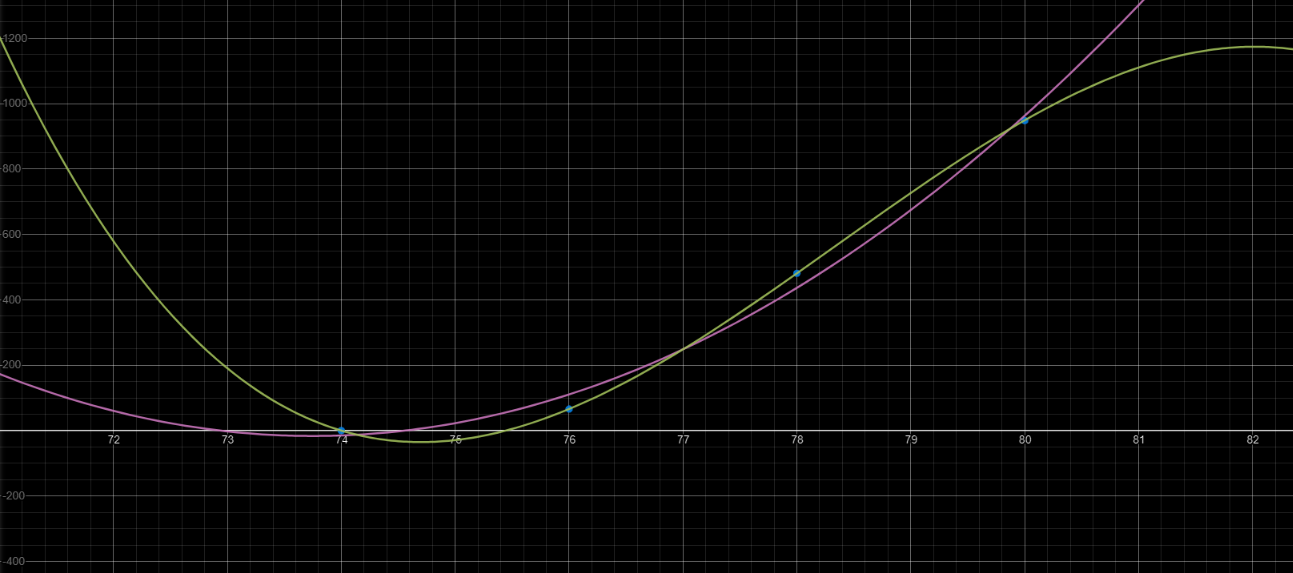

En color violeta la curva proveniente del ajuste, mientras que en naranja observamos el polinomio interpolador de Newton.


#Caudales en función del tiempo


Sabemos que la variación del volumen respecto del tiempo depende, entre otras variables, del caudal entrante (Qe) y del caudal saliente (Qs). Ahora bien, ¿Qué conocemos de la funciones $Q_e(t)$ y $Q_s(t)$? 

La única información que tenemos acerca de ellas son valores que toman en un conjunto de puntos, con lo cual, así como hicimos con $V(cota)$, precisamos aproximarlas por otras funciones, ya sea ajustando los datos, o bien interpolando.

Consideramos que la primera forma supone la ventaja de poder trabajar con polinomios de grado menor que la cantidad de datos brindados, mientras que la interpolación impone la condición de que $f(x_i)=p(x_i)$ para todo $x_i$ utilizado en la medición. Así, ajustando los datos podríamos construir un polinomio "simple" (entendiendo por "simple" el hecho de ser combinación lineal de pocas funciones base) capaz de minimizar considerablemente el error cuadrático medio; en cambio, si optáramos por la interpolación indefectiblemente deberíamos armar un polinomio de orden 11, pues disponemos de 12 puntos. Con los datos presentes, y haciendo uso de lo aprendido en la teoría, podríamos recurrir a los polinomios de Newton y Lagrange. Para el primero deberíamos calcular 11 diferencias divididas, en tanto que para el segundo requeriríamos del armado de 11 operadores de Lagrange. 

Luego, por una cuestión de pragmatismo, decidimos aproximar tanto a $Q_e(t)$ como a $Q_s(t)$ ajustando los puntos conocidos, eligiendo convenientemente los intervalos en que regirá cada polinomio.

(ver polinomios en Anexo (b))

##Anexo (b):

####Diferencias divididas

$b_0=f(x_0)$

$b_1=f[x_0,x_1]=\frac{f(x_1)-f(x_0)}{x_1-x_0}$

$b_2=f[x_0,x_1,x_2]=\frac{f[x_1,x_2]-f[x_0,x_1]}{x_2-x_0}=\frac{\frac{f(x_2)-f(x_1)}{x_2-x_1}-\frac{f(x_1)-f(x_0)}{x_1-x_0}}{x_2-x_0}$

$.$

$.$

$.$

$b_n=f[x_0,x_1,...,x_n]=\frac{f[x_1,...,x_{n-1},x_{n}]-f[x_0,x_1,...,x_{n-1}]}{x_n-x_0}$

Para $p_3(x)$ hemos tenido que calcular $b_0$, $b_1$, $b_2$ y $b_3$ con $f(x)=V(cota)$

$Cotas:$

$x_0=74$

$x_1=76$

$x_2=78$

Luego

$b_0=0$

$b_1=\frac{66-0}{76-74}=33$

$b_2=\frac{207,5-33}{78-74}=43,625$

$b_3=-6,167$


#Polinomios

###Caudal entrante

$Q_e(t)≈ p_{Qe1} \cdot \mathbf{1}  \left \{ 0\leq t\leq 166 \right \}+25 \cdot \mathbf{1}  \left \{ 166< t< 196 \right \} +p_{Qe2} \cdot \mathbf{1}  \left \{ 196\leq t\leq 365 \right \} $


1.   $p_{Qe1}=0,00000421795\cdot t^3-0,000791466\cdot t^2+0,141527\cdot t+3,99793 $
2.    $p_{Qe2}=-4,8213\cdot 10^{-7}\cdot t^3+0,00104328\cdot t^2-0,582391\cdot t+102,555 $


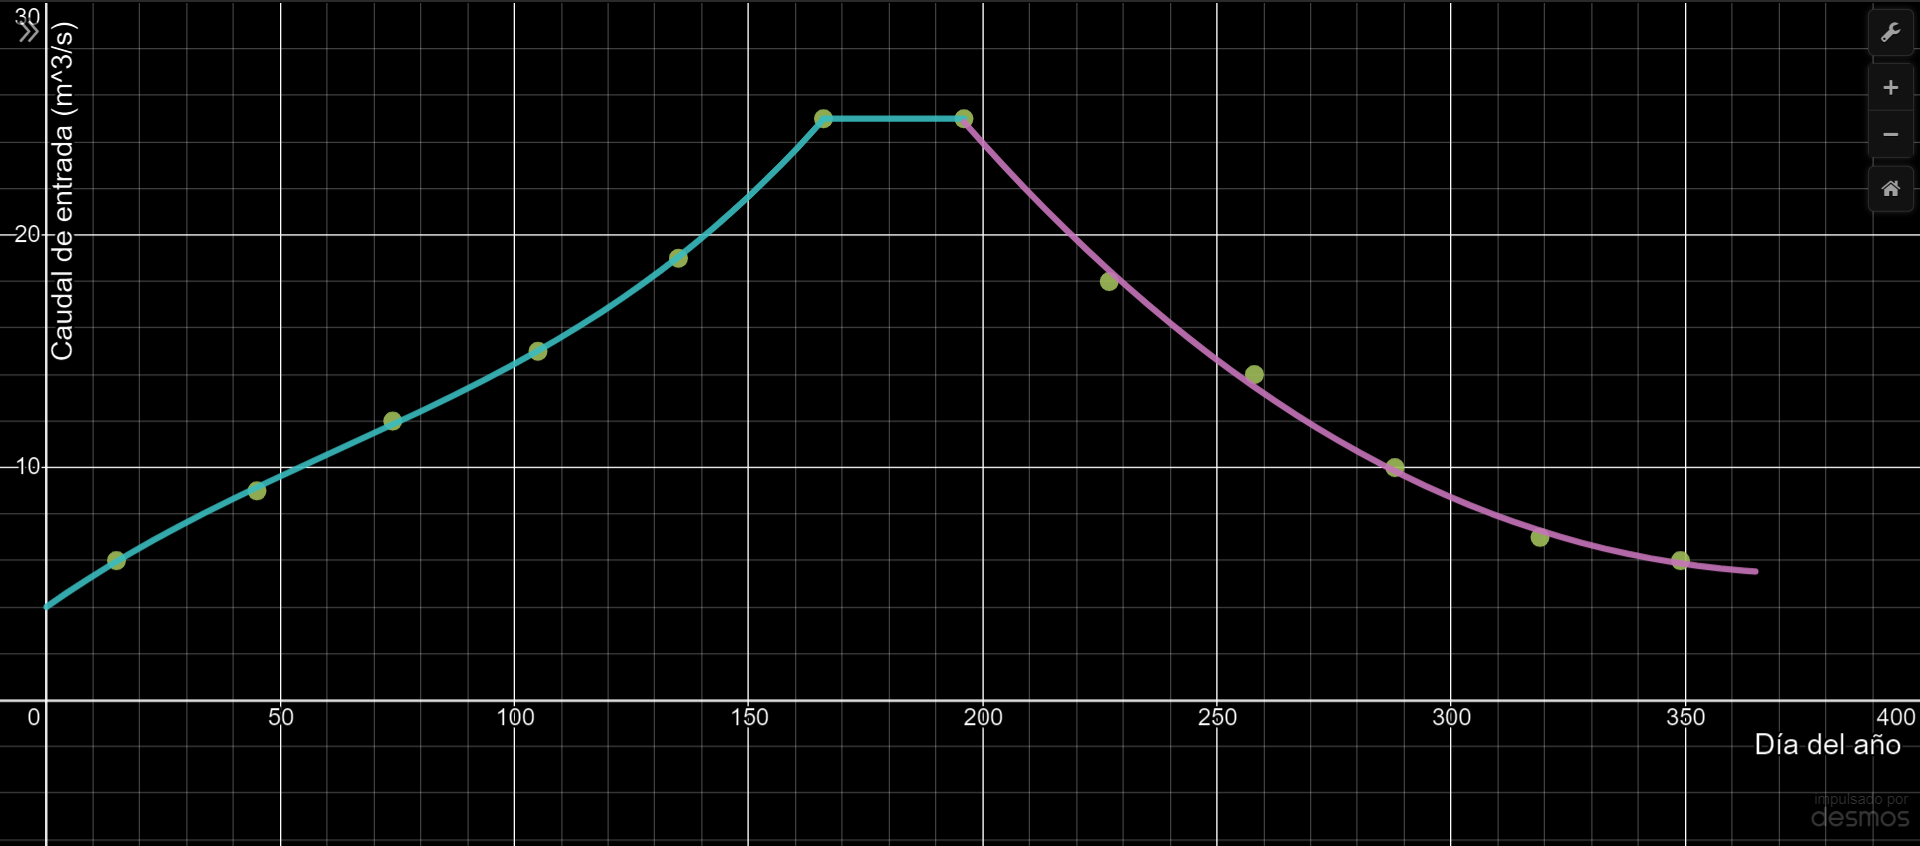


En base a lo antedicho, elegimos aproximar a $Q_e(t)$ y $Q_s(t)$ ajustando los datos por polinomios simples. 

Para $Q_e(t)$ creímos pertinente, dada la disposicón de los puntos conocidos, la conformación de una función partida en tres intervalos; de este modo logramos que $Q^*_e(t)$ pasara muy próximo a cada uno de los datos. Tal escenario no habría sido posible si hubiéramos adoptado un único polinomio de igual grado que los anteriores.





###Caudal saliente 

$Q_s(t)≈0\cdot \mathbf{1}\left\{0\le t\le45\right\}+(\frac{12}{74-45}\cdot\left(t-45\right)\ +\ 0)\cdot \mathbf{1}\ \left\{45\le t\le74\right\}+(\frac{15-12}{105-74}\cdot\left(t-74\right)\ +\ 12)\cdot \mathbf{1}\ \left\{74\le t\le105\right\}+(\frac{19-15}{135-105}\cdot\left(t-105\right)\ +\ 15)\cdot \mathbf{1}\ \left\{105\le t\le135\right\}+(\frac{44-19}{166-135}\cdot\left(t-135\right)\ +\ 19)\cdot \mathbf{1}\ \left\{135\le t\le166\right\}+(\frac{34-44}{196-166}\cdot\left(t-166\right)\ +\ 44)\cdot \mathbf{1}\ \left\{166\le t\le196\right\}+(\frac{18-34}{227-196}\cdot\left(t-196\right)\ +34)\cdot \mathbf{1}\ \left\{196\le t\le227\right\}+(\frac{14-18}{258-227}\cdot\left(t-227\right)\ +18)\cdot \mathbf{1}\ \left\{227\le t\le258\right\}+(\frac{10-14}{288-258}\cdot\left(t-258\right)\ +14)\cdot \mathbf{1}\ \left\{258\le t\le288\right\}+(\frac{0-10}{319-288}\cdot\left(t-288\right)\ +10)\cdot \mathbf{1}\ \left\{288\le t\le319\right\}+0\cdot \mathbf{1}\ \left\{319\le t\le365\right\}$


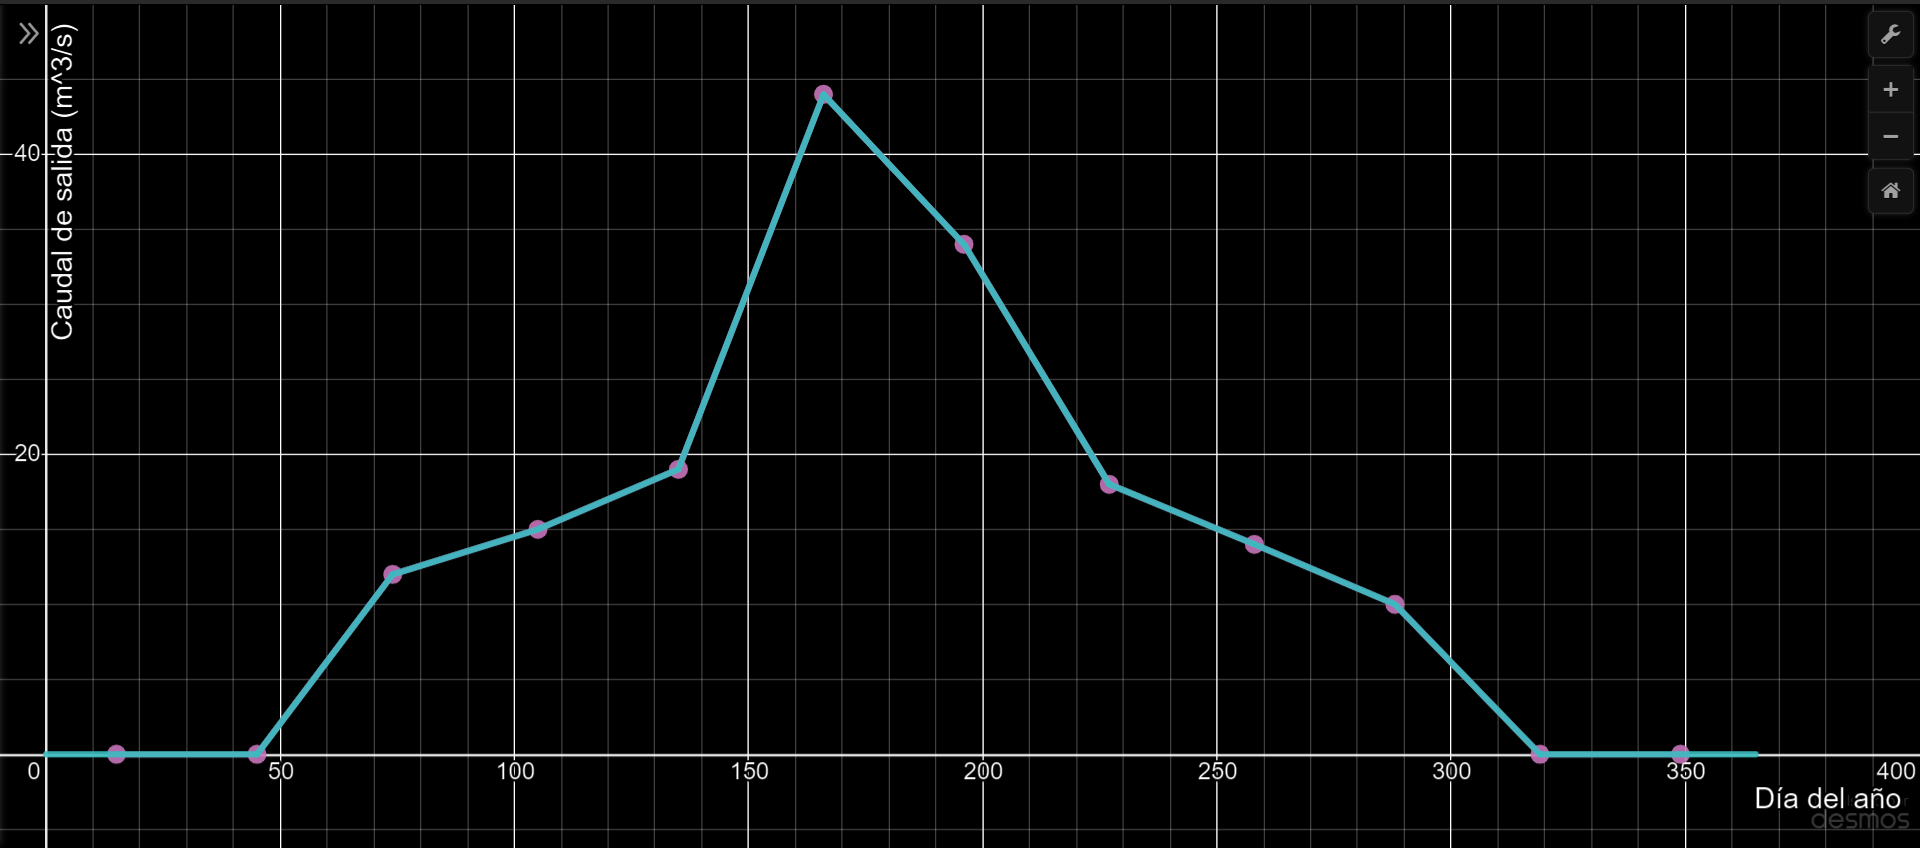


En lo que a $Q_s(t)$ respecta, inicialmente procuramos utilizar polinomios de órdenes 2 y 3 para construir $Q^*_s(t)$, tal como veníamos haciéndolo. Sin embargo, efectuándolo de este modo nos topamos con algunos inconvenientes: en primer lugar, la estimación no tenía el mismo nivel de precisión que el alcanzado con $Q^*_e(t)$. Cabe destacar que el análisis que nos conduce a argumentar lo anterior es méramente cualitativo, pues se sustenta con la información gráfica presentada por la herramienta $Desmos$. Por otra parte, los polinomios (trazamos dos, cada uno en un intervalo distinto, debido a la forma descripta por los datos) que minimizaban el error cuadrático medio presentaban la desventaja de contar con imágenes negativas cerca de los extremos del período temporal en estudio (físicamente imposible en este caso).

Con lo cual, finalmente decidimos unir los puntos sucesivos (incluidos los extremos del intervalo anual) con segmentos, de modo que $Q^*_s(t)$ contiene a todos los datos brindados.

##c) Implementar la solución numérica en un código computacional utilizando un paso de discretización temporal diario. Arrancar con el nivel de la laguna en Cota0, estimando el volumen inicial a partir de la curva que mejor representa los datos CotaVolumen obtenida en el paso b). Graficar OD y DBO resultante en la laguna.



En este inciso aplicamos un código computacional escrito en Python, que da lugar a los siguientes gráficos:

(El código se presentará a continuación)

###Euler explícito:

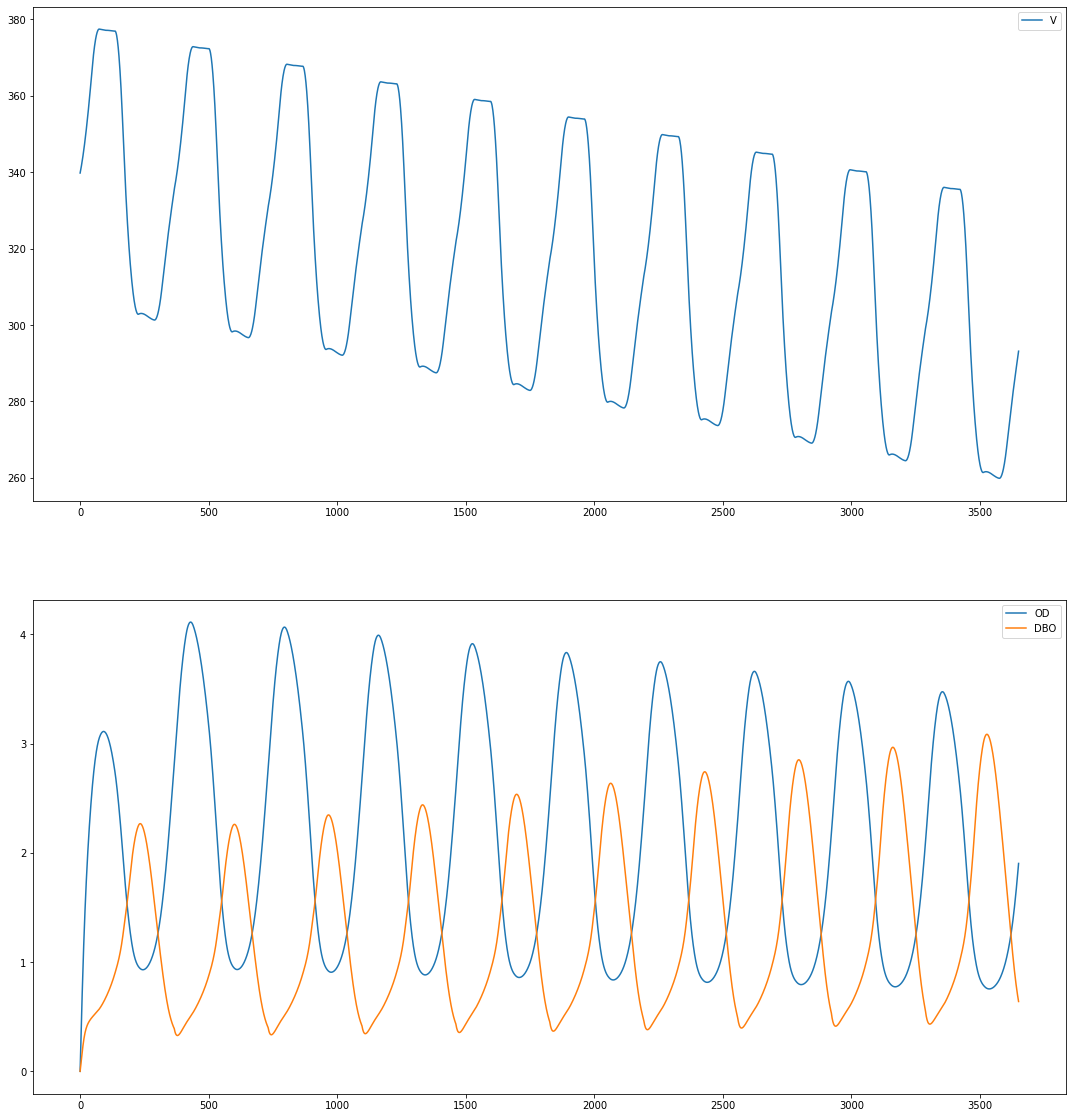

Runge-Kutta 2:

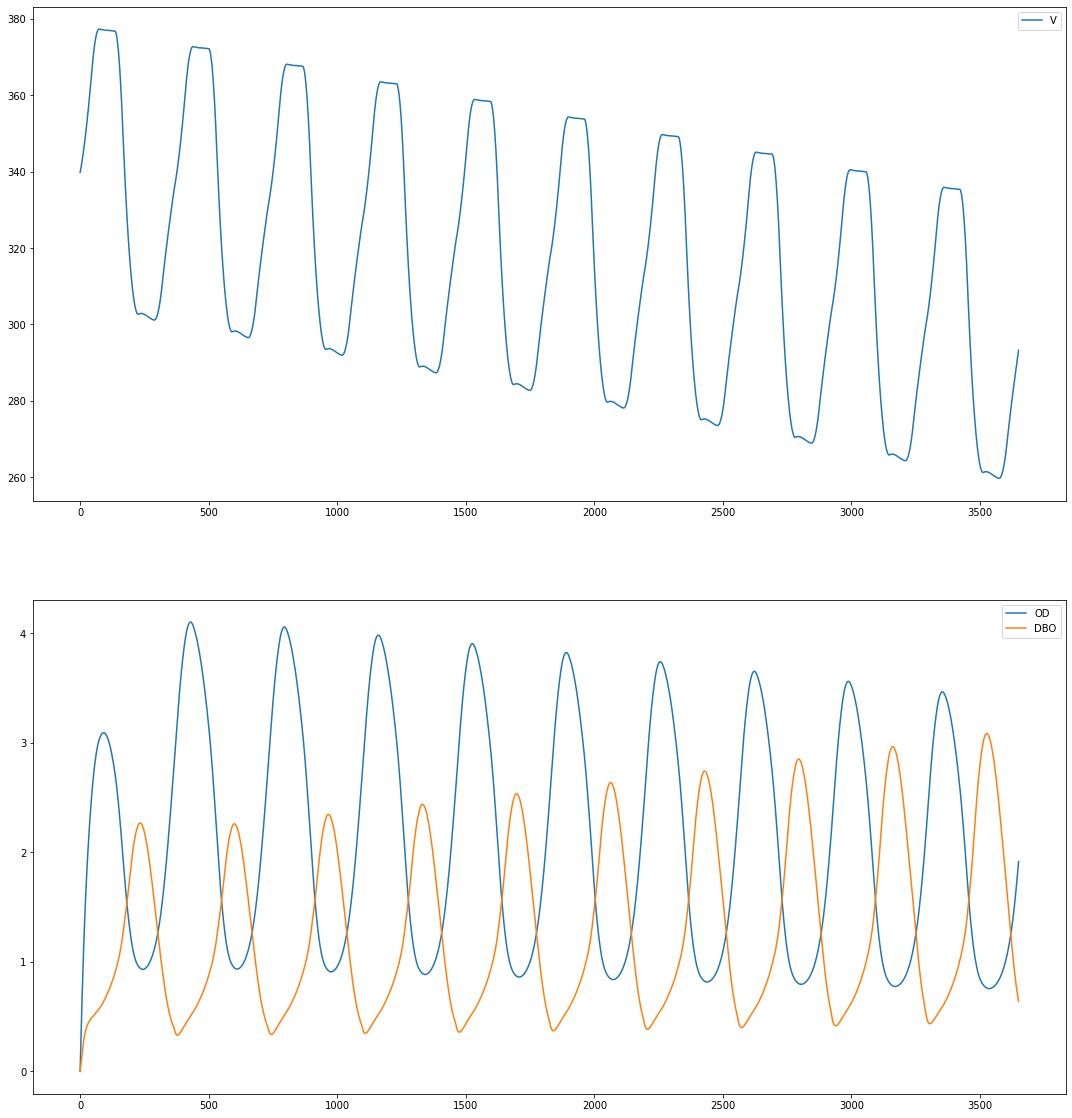

Runge-Kutta 4:

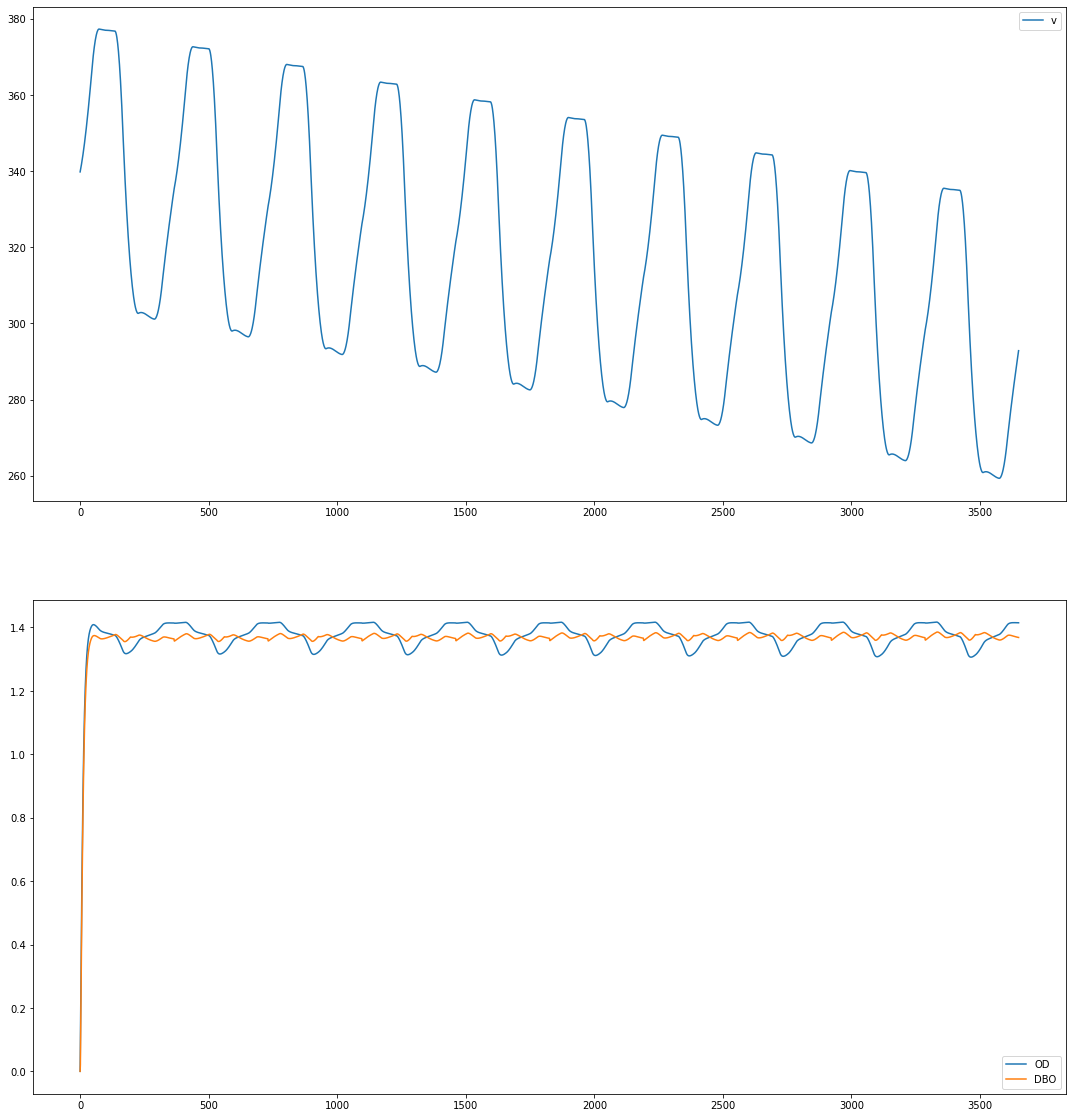


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ODe = 2
ODs = 9
DBOe = 20
Ka = 0.01
Kbd0 = 0.1
kO2 = 1.4
tmax = 3650
h = 1

def Qe(t):
    ajuste = lambda i: 365 * (i-1)
    for i in range(1, 20+1):
        if t >= ajuste(i) and t <= ajuste(i) + 166:
            return 0.00000421795 * (t - ajuste(i))**3 - 0.000791466 * (t - ajuste(i))**2 + 0.141527 * (t - ajuste(i)) + 3.99793
        elif t > (166 + ajuste(i)) and t < 196+ ajuste(i):
            return 25
        elif t >= (196 + ajuste(i)) and t <= (365 + ajuste(i)):
            return -4.8213e-7 * (t - ajuste(i))**3 + 0.00104328 * (t - ajuste(i))**2 - 0.582391 * (t - ajuste(i)) + 102.555

def Qs(t):
    ajuste = lambda i: 365 * (i-1)

    for i in range(1, 20+1):
        if (t >= (0 + ajuste(i)) and t <= (45 + ajuste(i))) or (t > (319 + ajuste(i)) and t <= (365 + ajuste(i))):
            return 0
        elif t > (45 + ajuste(i)) and t <= (74 + ajuste(i)):
            return ((12 / 29) * ((t - ajuste(i)) - 45))
        elif t > (74 + ajuste(i)) and t <= (105 + ajuste(i)):
            return ((3/31) * ((t - ajuste(i)) - 74) + 12)
        elif t > (105 + ajuste(i)) and t <= (135 + ajuste(i)):
            return ((2/15) * ((t - ajuste(i)) - 105) + 15)
        elif t > (135 + ajuste(i)) and t <= (166 + ajuste(i)):
            return ((25/31) * ((t - ajuste(i)) - 135) + 19)
        elif t > (166 + ajuste(i)) and t <= (196 + ajuste(i)):
            return ((-1/3) * ((t - ajuste(i)) - 166) + 44)
        elif t > (196 + ajuste(i)) and t <= (227 + ajuste(i)):
            return ((-16/31) * ((t - ajuste(i)) - 196) + 34)
        elif t > (227 + ajuste(i)) and t <= (258 + ajuste(i)):
            return ((-4/31) * ((t - ajuste(i)) - 227) + 18)
        elif t > (258 + ajuste(i)) and t <= (288 + ajuste(i)):
            return ((-2/15) * ((t - ajuste(i)) - 258) + 14)
        elif t > (288 + ajuste(i)) and t <= (319 + ajuste(i)):
            return ((-10/31) * ((t - ajuste(i)) - 288) + 10)


def f(Qe, Qs):
    return Qe - Qs

def g(Qe, Qs, Vn, ODn, DBOn):
    return (Qe * ODe - Qs * ODn + Ka * Vn * (ODs - ODn) - Kbd0 * (ODn**2 / (ODn**2 + kO2)) * Vn * DBOn) / Vn

def s(Qe, Qs, Vn, ODn, DBOn):
    return (Qe * DBOe - Qs * DBOn - Kbd0 * (ODn**2 / (ODn**2 + kO2)) * Vn * DBOn) / Vn

def euler_explicito(tmax, h):
    n = int(tmax / h)
    v = np.zeros(n)
    v[0] = 339.79
    OD = np.zeros(n)
    OD[0] = 0
    DBO = np.zeros(n)
    DBO[0] = 0
    x = np.linspace(0, tmax, n)
    for i in range(1, n):
        v[i] = v[(i-1)] + h * f(((86400 / 1e6))*Qe(h*(i-1)), (86400 / 1e6)*Qs(h*(i-1)))
        OD[i] = OD[(i-1)] + h * g((86400)*Qe(h*(i-1)), (86400)*Qs(h*(i-1)), v[i-1]*1e6, OD[i-1], DBO[i-1])
        DBO[i] = DBO[(i-1)] + h * s((86400)*(Qe(h*(i-1))), (86400)*Qs(h*(i-1)), v[(i-1)]*1e6, OD[i-1], DBO[i-1])

    return x, v, OD, DBO

def Runge_Kutta2(tmax, h):
    n = int(tmax / h)
    v = np.zeros(n)
    v[0] = 339.7876
    OD = np.zeros(n)
    OD[0] = 0
    DBO = np.zeros(n)
    DBO[0] = 0
    x = np.linspace(0, tmax, n)
    
    for i in range(1, n):
        q1v = h * f(((86400 / 1e6))*Qe(h*(i-1)), (86400 / 1e6)*Qs(h*(i-1)))
        q1OD = h * g((86400)*Qe(h*(i-1)), (86400)*Qs(h*(i-1)), v[i-1]*1e6, OD[i-1], DBO[i-1])
        q1DBO = h * s((86400)*(Qe(h*(i-1))), (86400)*Qs(h*(i-1)), v[(i-1)]*1e6, OD[i-1], DBO[i-1])

        q2v = h * f(((86400 / 1e6))*Qe(h*(i)), (86400 / 1e6)*Qs(h*(i)))
        q2OD = h * g((86400)*Qe(h*(i)), (86400)*Qs(h*(i)), v[i-1]*1e6 + q1v*1e6, OD[i-1] + q1OD, DBO[i-1] + q1DBO)
        q2DBO = h * s((86400)*(Qe(h*(i))), (86400)*Qs(h*(i)), v[(i-1)]*1e6 + q1v*1e6, OD[i-1] + q1OD, DBO[i-1] + q1DBO)
        
        v[i] = v[(i-1)] + 1/2*(q1v + q2v)
        OD[i] = OD[(i-1)] + 1/2*(q1OD + q2OD)
        DBO[i] = DBO[(i-1)] + 1/2*(q1DBO + q2DBO)

    return x, v, OD, DBO

def Runge_Kutta4(tmax, h):
    n = int(tmax / h)
    v = np.zeros(n)
    v[0] = 339.7876
    OD = np.zeros(n)
    OD[0] = 0
    DBO = np.zeros(n)
    DBO[0] = 0
    x = np.linspace(0, tmax, n)

    for i in range(1, n):
        q1v = h * f(((86400 / 1e6))*Qe(h*(i-1)), (86400 / 1e6)*Qs(h*(i-1)))
        q1OD = h * g((86400)*Qe(h*(i-1)), (86400)*Qs(h*(i-1)), v[i-1]*1e6, OD[i-1], DBO[i-1])
        q1DBO = h * s((86400)*Qe(h*(i-1)), (86400)*Qs(h*(i-1)), v[i-1]*1e6, OD[i-1], DBO[i-1])

        q2v = h * f(((86400 / 1e6))*Qe(h*(i-(1/2))), (86400 / 1e6)*Qs(h*(i-(1/2))))
        q2OD = h * g((86400)*Qe(h*(i-(1/2))), (86400)*Qs(h*(i-(1/2))), v[i-1]*1e6 + (1/2 * q1v*1e6), OD[i-1] + (1/2 * q1OD), DBO[i-1] + (1/2 * q1DBO))
        q2DBO = h * s((86400)*Qe(h*(i-(1/2))), (86400)*Qs(h*(i-(1/2))), v[i-1]*1e6 + (1/2 * q1v*1e6), OD[i-1] + (1/2 * q1OD), DBO[i-1] + (1/2 * q1DBO))
        
        q3v = q2v
        q3OD = h * g((86400)*Qe(h*(i-(1/2))), (86400)*Qs(h*(i-(1/2))), v[i-1]*1e6 + (1/2 * q2v*1e6), OD[i-1] + (1/2 * q2OD), DBO[i-1] + (1/2 * q2DBO))
        q3DBO = h * s((86400)*Qe(h*(i-(1/2))), (86400)*Qs(h*(i-(1/2))), v[i-1]*1e6 + (1/2 * q2v*1e6), OD[i-1] + (1/2 * q2OD), DBO[i-1] + (1/2 * q2DBO))
        
        q4v = h * f(((86400 / 1e6))*Qe(h*(i)), (86400 / 1e6)*Qs(h*(i)))
        q4OD = h * g((86400)*Qe(h*(i)), (86400)*Qs(h*(i)), v[i-1]*1e6 + q3v, OD[i-1] + q3OD, DBO[i-1] + q3DBO)
        q4DBO = h * s((86400)*Qe(h*(i)), (86400)*Qs(h*(i)), v[i-1]*1e6 + q3v, OD[i-1] + q3OD, DBO[i-1] + q3DBO)

        v[i] = v[(i-1)] + 1/6*(q1v + 2 * (q2v + q3v) + q4v)
        OD[i] = OD[(i-1)] +  1/6*(q1OD + 2 * (q2OD + q3OD) + q4OD)
        DBO[i] = OD[(i-1)] +  1/6*(q1DBO + 2 * (q2DBO + q3DBO) + q4DBO)

    return x, v, OD, DBO

n = int(tmax / h)

min_a_garantizar = np.zeros(n)

for i in range(0, n):
    min_a_garantizar[i] = 4




# Aplicación de Euler Explícito

In [ ]:
x, v, OD, DBO = euler_explicito(tmax=3650, h=1)


fig, ax = plt.subplots(2, figsize=(18.5, 20))

ax[0].plot(x, v, label='V')
ax[0].legend()

ax[1].plot(x, OD, label='OD')
ax[1].plot(x, DBO, label='DBO')
ax[1].plot(x,min_a_garantizar, label='Valor mínimo a garantizar de OD')
ax[1].legend()

# Aplicación de Runge Kutta 2

In [ ]:
x, v_rk2, OD_rk2, DBO_rk2 = Runge_Kutta2(tmax=3650, h=1)


fig, ax = plt.subplots(2, figsize=(18.5, 20))

ax[0].plot(x, v_rk2, label='V')
ax[0].legend()

ax[1].plot(x, OD_rk2, label='OD')
ax[1].plot(x, DBO_rk2, label='DBO')
ax[1].plot(x,min_a_garantizar, label='Valor mínimo a garantizar de OD')
ax[1].legend()

# Aplicación de Runge Kutta 4

In [ ]:
x, v_rk4, OD_rk4, DBO_rk4 = Runge_Kutta4(tmax=3650, h=1)

fig, ax = plt.subplots(2, figsize=(18.5, 20))

ax[0].plot(x, v_rk4, label='v')
ax[0].legend()

ax[1].plot(x, OD_rk4, label='OD')
ax[1].plot(x, DBO_rk4, label='DBO')
ax[1].legend()

# Superposición de resultados de los 3 métodos

In [ ]:
h = 1
h2 = 0.01
_, V_ee, OD_ee, DBO_ee = euler_explicito(tmax=3650, h=1)
_, V_rk2, OD_rk2, DBO_rk2 = Runge_Kutta2(tmax=3650, h=1)
_, V_rk4, OD_rk4, DBO_rk4 = Runge_Kutta4(tmax=3650, h=1)
_, V_exact, OD_exact, DBO_exact = Runge_Kutta4(tmax=3650, h=0.01)

n = int(tmax / h)
m = int(tmax/h2)
x = np.linspace(0, tmax, n)
x2 = np.linspace(0, tmax, m)

fig, ax = plt.subplots(3, figsize=(18.5, 20))

ax[0].plot(x, V_ee, label='V-Euler Expl')
ax[0].plot(x, V_rk2, label='V-RK2')
ax[0].plot(x, V_rk4, label='V-RK4')
ax[0].plot(x2, V_exact, label = "V-Exact")
ax[0].legend()
ax[0].grid()

ax[1].plot(x, OD_ee, label='OD-Euler')
ax[1].plot(x, OD_rk2, label='OD-RK2')
ax[1].plot(x, OD_rk4, label='OD-RK4')
ax[1].plot(x2, OD_exact, label = "OD-exact")
ax[1].legend()
ax[1].grid()

ax[2].plot(x, DBO_ee, label='DBO-Euler')
ax[2].plot(x, DBO_rk2, label='DBO-RK2')
ax[2].plot(x, DBO_rk4, label='DBO-RK4')
ax[2].plot(x2, DBO_exact, label = "DBO-exact")
ax[2].legend()
ax[2].grid()

#d) Estimar el error de truncamiento para el OD y DBO con los 3 métodos. Graficar.

Hemos decidido efectuar dicha labor promediando los errores generados en cada instante de tiempo analizado. Estos últimos no son más que el módulo de la diferencia entre la solución aproximada y la solución "real", que a su vez modelamos por Runge Kutta 4 con un paso muy pequeño (h = 0,01).

¿Qué esperamos observar? (Al haber finalizado los gráficos de (c) dar conclusiones)

En primer lugar, teóricamente esperaríamos que el error calculado fuera disminuyendo considerablemente conforme aumentamos el orden del método. Sin embargo, vemos en los gráficos del punto anterior que la solución aproximada por RK2 es muy parecida a la que se obtiene por EE, lo cual no debería ocurrir...

Por otra parte, en base a los fundamentos teóricos vistos en clase, sabemos que existe una relación entre el error y el paso de cálculo elegido para cada método:

Euler explícito, por tratarse de un método de orden 1, guarda una relación directamente proporcional con el paso. De modo que para cualquier variación porcentual de este último, esperamos una misma variación porcentual en el error. 

Runge-Kutta 2, por su parte, suministra un error proporcional al cuadrado del paso, con lo cual una fluctuación en el mismo de cierta magnitud provoca un cambio en el error en esa misma magnitud, elevada a la segunda potencia.

Finalmente, Runge-Kutta 4 presenta un error proporcional al paso a la cuarta; se cumple entonces una relación análoga a las antedichas, en este caso con la cuarta potencia.


In [ ]:
h = 7
_,V_ee, OD_ee, DBO_ee = euler_explicito(tmax=3650, h=7)
_,V_rk2, OD_rk2, DBO_rk2 = Runge_Kutta2(tmax=3650, h=7)
_,V_rk4, OD_rk4, DBO_rk4 = Runge_Kutta4(tmax=3650, h=7)

In [ ]:
_,V_exact, OD_exact, DBO_exact = Runge_Kutta4(tmax=3650, h=0.01)

In [ ]:
#Para el cálculo del error de truncamiento restaremos lo valores en cada día del año 3 al 10, pues a partir
#del segundo año comienza a estabilizarse. A partir de esos valores, tomamos el promedio como el error de 
#truncamiento. 

contOD = 0
contDBO = 0
contV = 0

for i in range (730, 3650):
    a = V_ee[int(i/h)-1] - V_exact[int(i/0.01)-1] 
    b = OD_ee[int(i/h)-1] - OD_exact[int(i/0.01)-1] 
    c = DBO_ee[int(i/h)-1] - DBO_exact[int(i/0.01)-1] 
    contV = contV + abs(a)
    contOD = contOD + abs(b)
    contDBO = contDBO + abs(c)
error_de_truncamiento_EE_V = contV/(3650-730)
error_de_truncamiento_EE_OD = contOD/(3650-730)
error_de_truncamiento_EE_DBO= contDBO/(3650-730)
print("En V, el error de truncamiento para el método de Euler explícito es:", error_de_truncamiento_EE_V)
print("En OD, el error de truncamiento para el método de Euler explícito es:", error_de_truncamiento_EE_OD)
print("En DBO, el error de truncamiento para el método de Euler explícito es:", error_de_truncamiento_EE_DBO)

contOD2 = 0
contDBO2 = 0
contV2 = 0

for i in range (730, 3650):
    a = V_rk2[int(i/h)-1] - V_exact[int(i/0.01)-1] 
    b = OD_rk2[int(i/h)-1] - OD_exact[int(i/0.01)-1] 
    c = DBO_rk2[int(i/h)-1] - DBO_exact[int(i/0.01)-1] 
    contV2 = contV2 + abs(a)
    contOD2 = contOD2 + abs(b)
    contDBO2 = contDBO2 + abs(c)
error_de_truncamiento_rk2_V = contV2/(3650-730)
error_de_truncamiento_rk2_OD = contOD2/(3650-730)
error_de_truncamiento_rk2_DBO= contDBO2/(3650-730)
print("En V, el error de truncamiento para el método de Runge Kutta 2 es:", error_de_truncamiento_rk2_V)
print("En OD, el error de truncamiento para el método de Runge Kutta 2 es:", error_de_truncamiento_rk2_OD)
print("En DBO, el error de truncamiento para el método de Runge Kutta 2 es:", error_de_truncamiento_rk2_DBO)

contOD3 = 0
contDBO3 = 0
contV3 = 0

for i in range (730, 3650):
    a = V_rk4[int(i/h)-1] - V_exact[int(i/0.01)-1] 
    b = OD_rk4[int(i/h)-1] - OD_exact[int(i/0.01)-1] 
    c = DBO_rk4[int(i/h)-1] - DBO_exact[int(i/0.01)-1] 
    contV3 = contV3 + abs(a)
    contOD3 = contOD3 + abs(b)
    contDBO3 = contDBO3 + abs(c)
error_de_truncamiento_rk4_V = contV3/(3650-730)
error_de_truncamiento_rk4_OD = contOD3/(3650-730)
error_de_truncamiento_rk4_DBO= contDBO3/(3650-730)
print("En V, el error de truncamiento para el método de Runge Kutta 4 es:", error_de_truncamiento_rk4_V)
print("En OD, el error de truncamiento para el método de Runge Kutta 4 es:", error_de_truncamiento_rk4_OD)
print("En DBO, el error de truncamiento para el método de Runge Kutta 4 es:", error_de_truncamiento_rk4_DBO)

In [ ]:
def graf_errores(hs):
    error_de_truncamiento_EE_V = np.zeros(len(hs))
    error_de_truncamiento_EE_OD = np.zeros(len(hs))
    error_de_truncamiento_EE_DBO = np.zeros(len(hs))

    error_de_truncamiento_rk2_V = np.zeros(len(hs))
    error_de_truncamiento_rk2_OD = np.zeros(len(hs))
    error_de_truncamiento_rk2_DBO = np.zeros(len(hs))

    error_de_truncamiento_rk4_V = np.zeros(len(hs))
    error_de_truncamiento_rk4_OD = np.zeros(len(hs))
    error_de_truncamiento_rk4_DBO = np.zeros(len(hs))

    for j, h in enumerate(hs):
        _, V_ee, OD_ee, DBO_ee = euler_explicito(tmax=3650, h=h)
        _, V_rk2, OD_rk2, DBO_rk2 = Runge_Kutta2(tmax=3650, h=h)
        _, V_rk4, OD_rk4, DBO_rk4 = Runge_Kutta4(tmax=3650, h=h)

        contOD = 0
        contDBO = 0
        contV = 0

        for i in range (730, 3650):
            a = V_ee[int(i/h) - 1] - V_exact[int(i/0.01) - 1] 
            b = OD_ee[int(i/h) - 1] - OD_exact[int(i/0.01) - 1] 
            c = DBO_ee[int(i/h) - 1] - DBO_exact[int(i/0.01) - 1] 
            contV = contV + abs(a)
            contOD = contOD + abs(b)
            contDBO = contDBO + abs(c)
        error_de_truncamiento_EE_V[j] = contV/(3650-730)
        error_de_truncamiento_EE_OD[j] = contOD/(3650-730)
        error_de_truncamiento_EE_DBO[j] = contDBO/(3650-730)


        contOD2 = 0
        contDBO2 = 0
        contV2 = 0

        for i in range (730, 3650):
            a = V_rk2[int(i/h) - 1] - V_exact[int(i/0.01) - 1] 
            b = OD_rk2[int(i/h) - 1] - OD_exact[int(i/0.01) - 1] 
            c = DBO_rk2[int(i/h) - 1] - DBO_exact[int(i/0.01) - 1] 
            contV2 = contV2 + abs(a)
            contOD2 = contOD2 + abs(b)
            contDBO2 = contDBO2 + abs(c)
        error_de_truncamiento_rk2_V[j] = contV2/(3650-730)
        error_de_truncamiento_rk2_OD[j] = contOD2/(3650-730)
        error_de_truncamiento_rk2_DBO[j] = contDBO2/(3650-730)

        contOD3 = 0
        contDBO3 = 0
        contV3 = 0

        for i in range (730, 3650):
            a = V_rk4[int(i/h) - 1] - V_exact[int(i/0.01) - 1] 
            b = OD_rk4[int(i/h) - 1] - OD_exact[int(i/0.01) - 1] 
            c = DBO_rk4[int(i/h) - 1] - DBO_exact[int(i/0.01) - 1] 
            contV3 = contV3 + abs(a)
            contOD3 = contOD3 + abs(b)
            contDBO3 = contDBO3 + abs(c)
        error_de_truncamiento_rk4_V[j] = contV3/(3650-730)
        error_de_truncamiento_rk4_OD[j] = contOD3/(3650-730)
        error_de_truncamiento_rk4_DBO[j] = contDBO3/(3650-730)


    errores = [
        error_de_truncamiento_EE_V, error_de_truncamiento_EE_OD, error_de_truncamiento_EE_DBO,
        error_de_truncamiento_rk2_V, error_de_truncamiento_rk2_OD, error_de_truncamiento_rk2_DBO,
        error_de_truncamiento_rk4_V, error_de_truncamiento_rk4_OD, error_de_truncamiento_rk4_DBO
    ]

    nombres_errores = [
        'error_de_truncamiento_EE_V', 'error_de_truncamiento_EE_OD', 'error_de_truncamiento_EE_DBO',
        'error_de_truncamiento_rk2_V', 'error_de_truncamiento_rk2_OD', 'error_de_truncamiento_rk2_DBO',
        'error_de_truncamiento_rk4_V', 'error_de_truncamiento_rk4_OD', 'error_de_truncamiento_rk4_DBO'
    ]

    fig, ax = plt.subplots(len(errores), figsize=(18.5, 20))
    for i in range(len(errores)):
        ax[i].plot(hs, errores[i], label=nombres_errores[i])
        ax[i].legend()
        ax[i].grid()
h1 = np.linspace(1, 14, 27)
graf_errores(h1)

##Observaciones 

El programa desarrollado arroja las siguientes conclusiones:

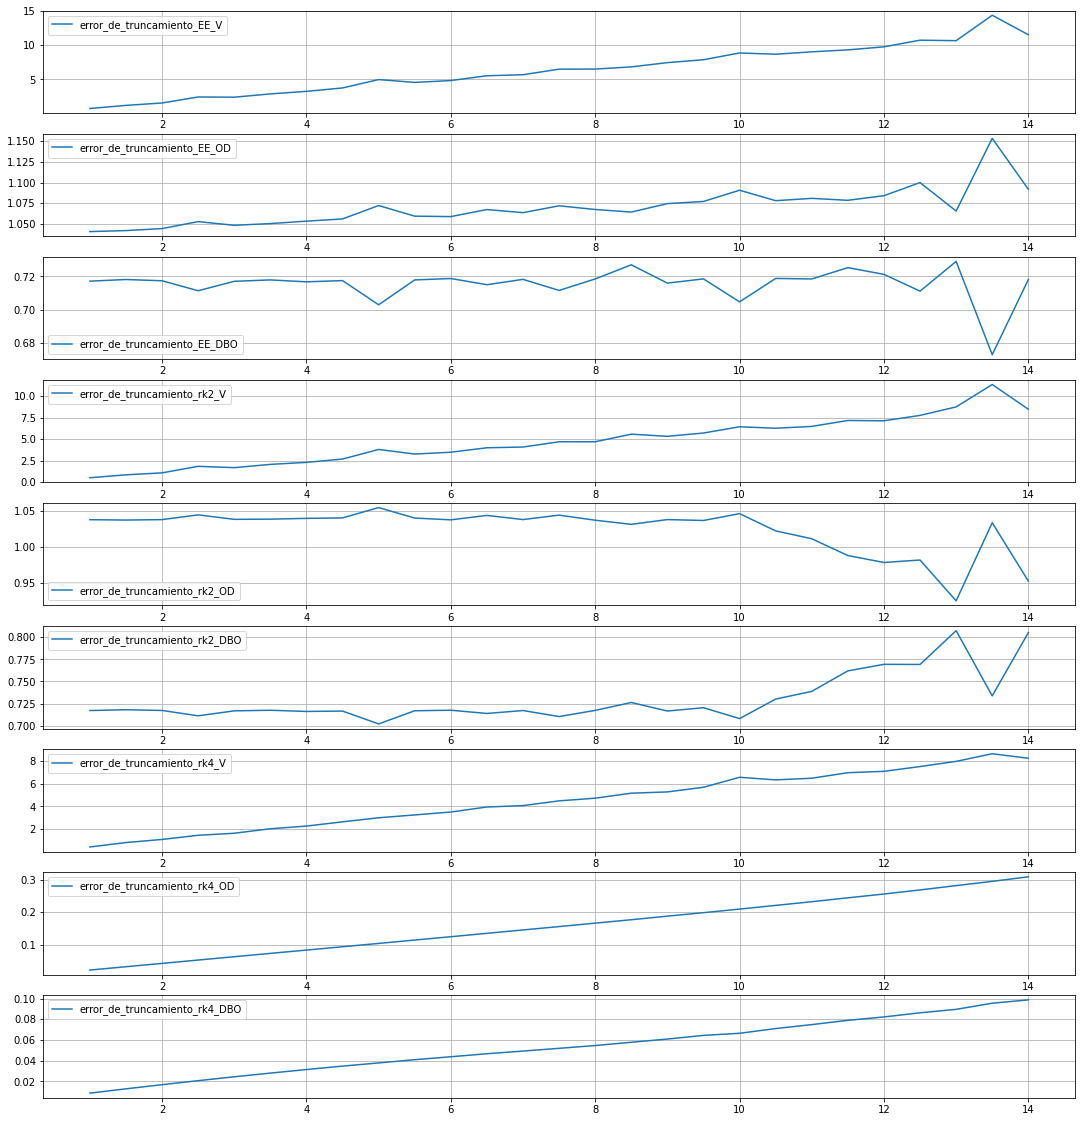

*  Euler explícito :

Como habíamos anticipado, el compartamiento del error en función del paso es lineal. Esto se ve reflejado en la gráfica, en donde los segmentos que unen a los puntos respresentados tienen aproximadamente la misma pendiente.



*   Runge-Kutta, orden 2 :

El gráfico deja en claro que la conducta predicha acerca del método no se cumple; la funcionalidad del error con el paso de cálculo lejos está de asemejarse a una cuadrática. No podemos explicar el porqué.



*   Runge-Kutta, orden 4 :

Para nuestra sorpresa, este método nos proporciona errores que mantienen una relación lineal con el paso, lo cual no responde al comportamiento teórico que debería tener. Tampoco sabemos a qué se debe dicho fenómeno...

#e) Determinar el porcentaje en que se debe reducir la concentración de DBO del río para que en todo el año se garantice OD mínimo enla laguna de 4 g/m3. Graficar OD y DBO resultante en la laguna.



Runge Kutta, orden 2 ($DBO_e = 5 \frac{g}{m^3}$):
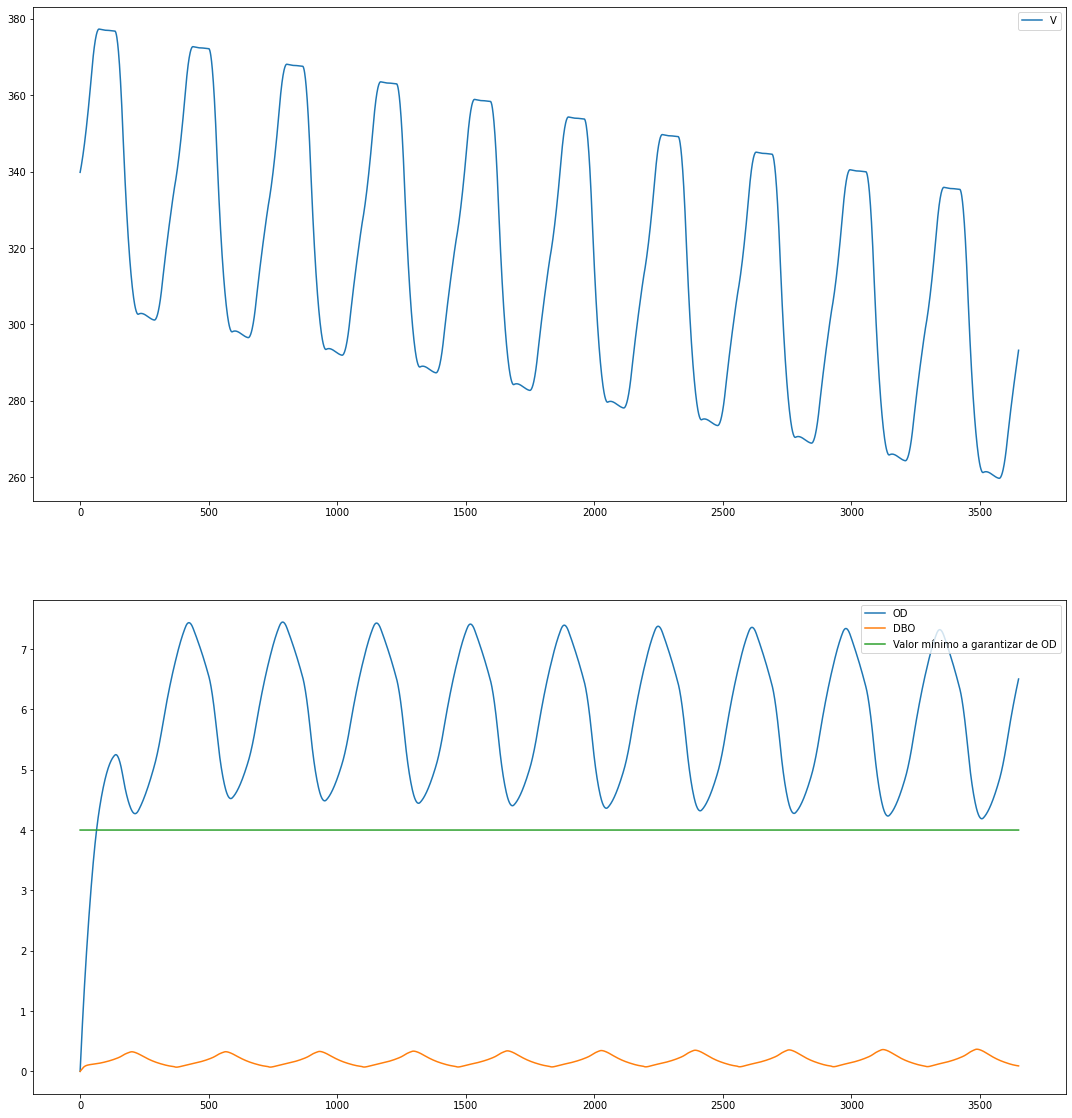

Euler explícito ($DBO_e = 5 \frac{g}{m^3}$):
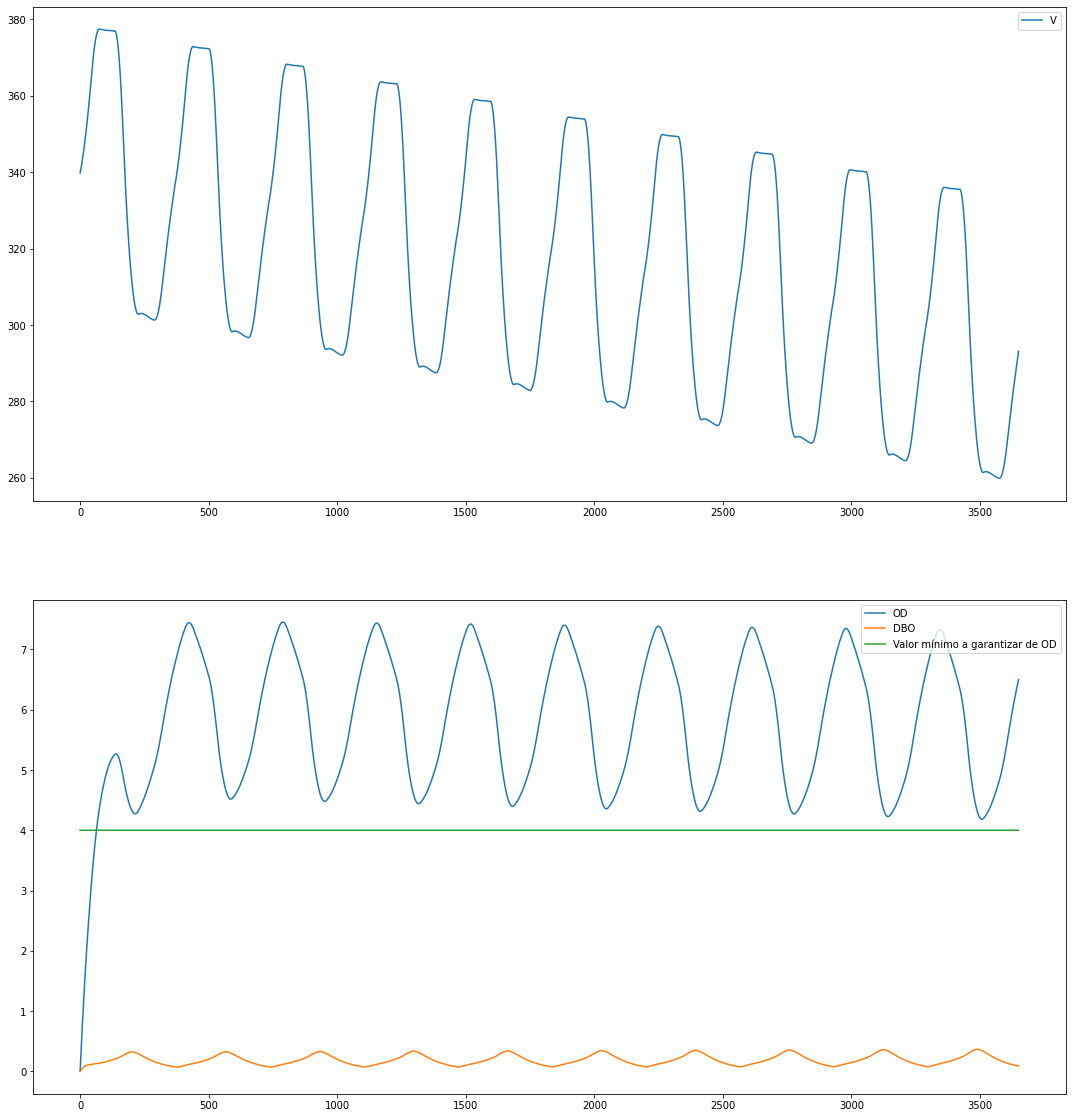

En las imagenes superiores pueden observarse tanto la graficas del OD como del DBO respecto del timepo, sumado a una linea de referencia a una altura de $4g/m^3$, encargada de representar el valor mínimo a garantizar de OD. Para la resolución de este inciso procedimos a la entrada de diversos valores de $DBO_e$, hasta encontrar uno que satisfaciera con lo pedido, que, como puede observarse, se trata de $DBO_e=5g/m^3$, es decir, 4 veces menor al valor inicial de $DBO_e=20g/m^3$. Como conclusión, resaltamos que fue necesaria una disminución en un 75%

# f) ¿Qué sucede en c) al considerar un paso de discretización temporal semanal? Evaluar el error de truncamiento.

Posteriormente, representaremos los gráficos de Volúmen (V), Oxígeno Disuelto (OD) y Demanda Biológica de Oxígeno (DBO) asociados a un método de orden 1 y orden 2, tomando un "paso" semanal, es decir, 7 días.

#Euler explícito con h = 7
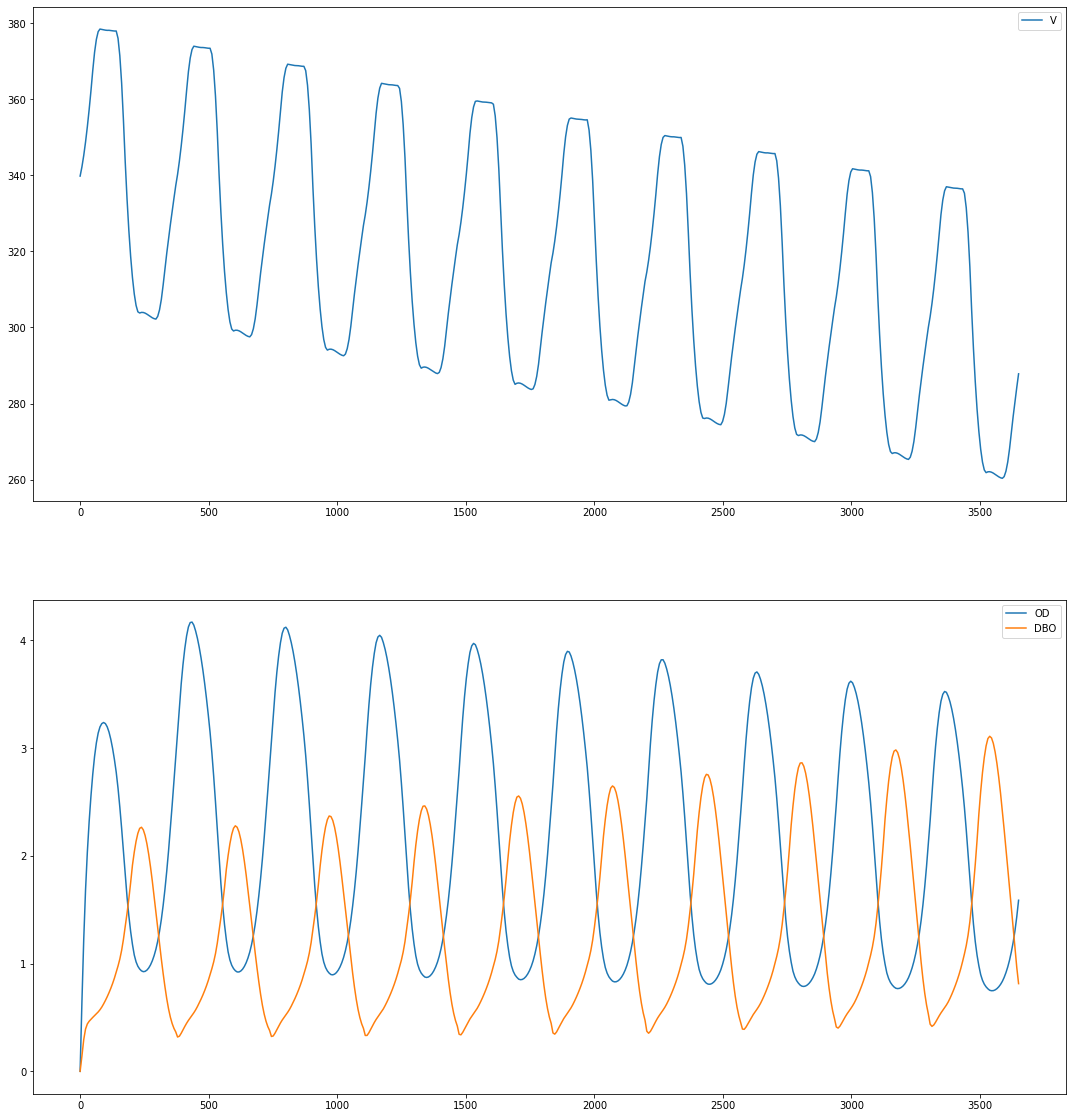

#Runge Kutta 2 con h = 7
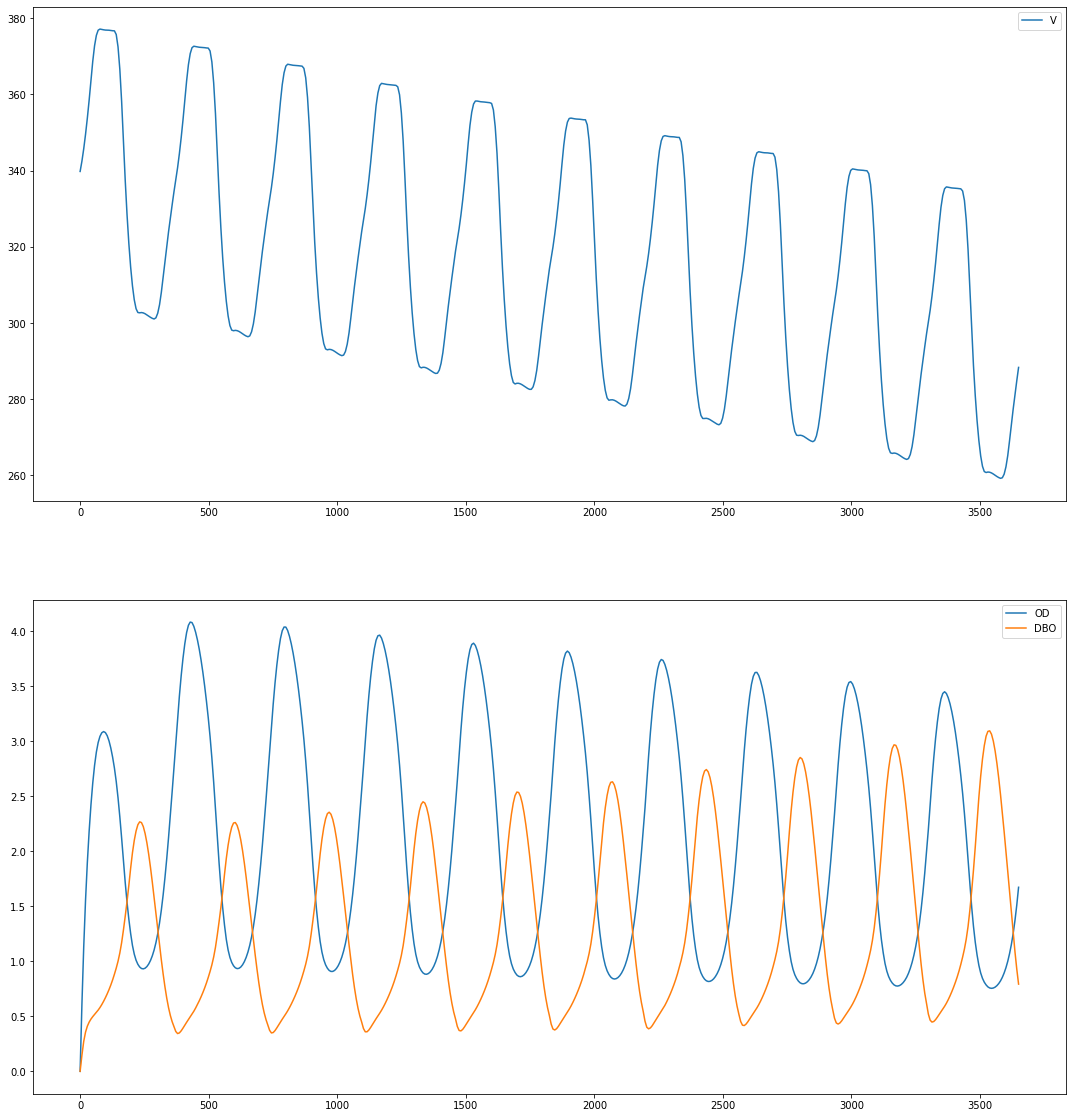

#Runge Kutta 4 con h = 7
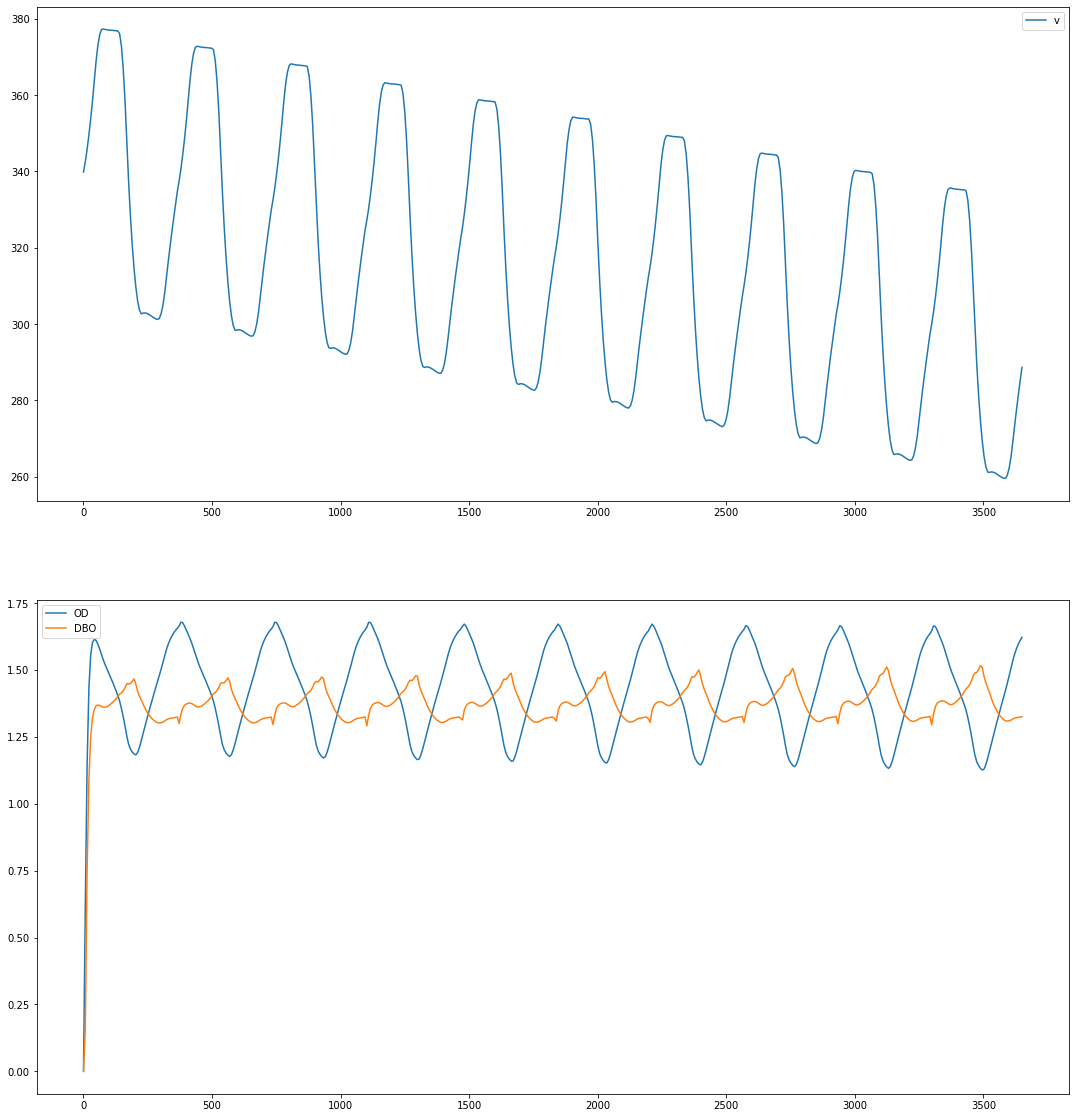

#Superposición de los métodos con h = 7
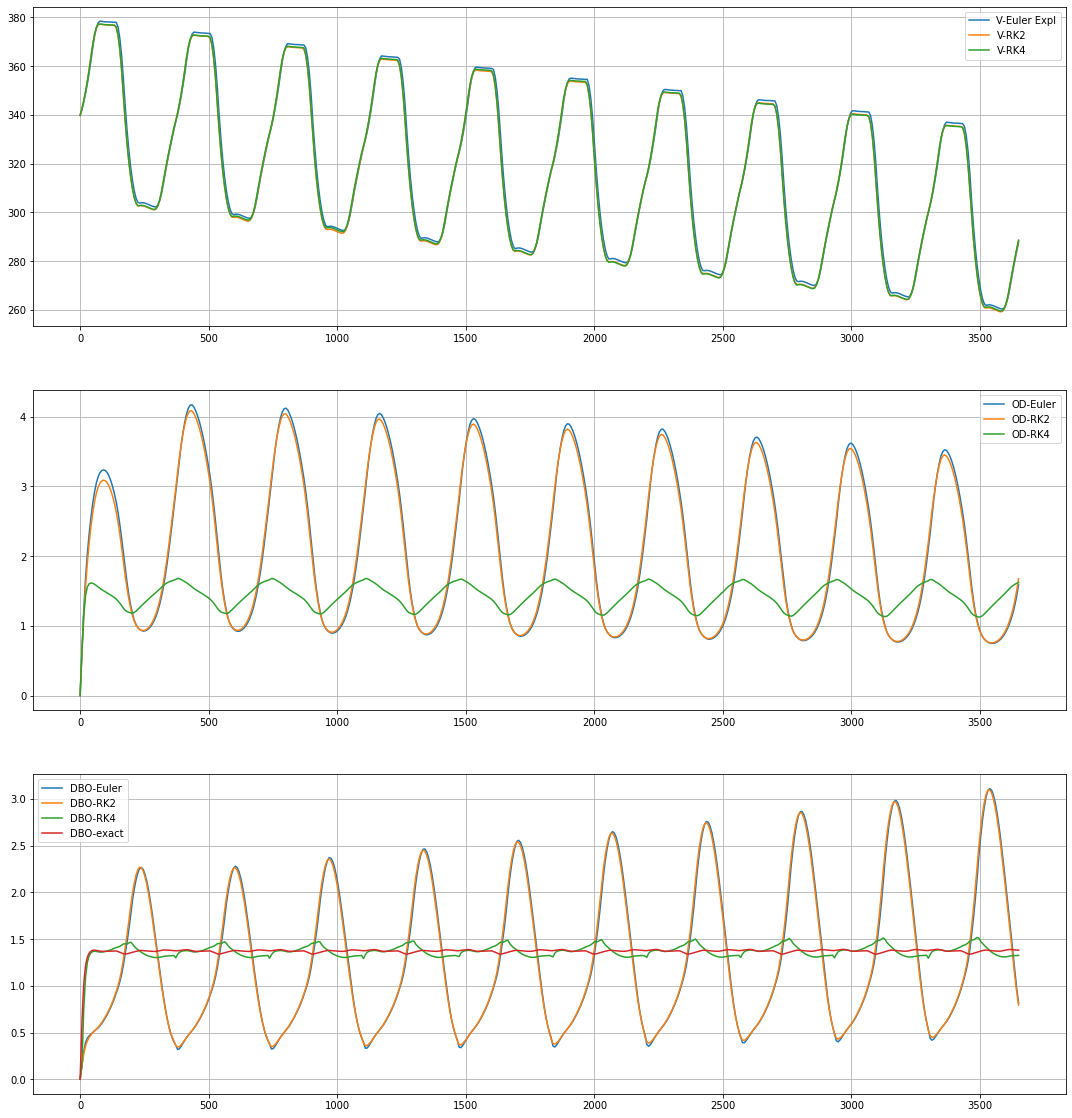

Como puede observarse, los valores de V, OD y DBO para los métodos de Euler explícito y Runge-Kutta de orden 2 resultan considerablemente similares, llegando a solaparse en el gráfico.

Errores de truncamiento con h = 1
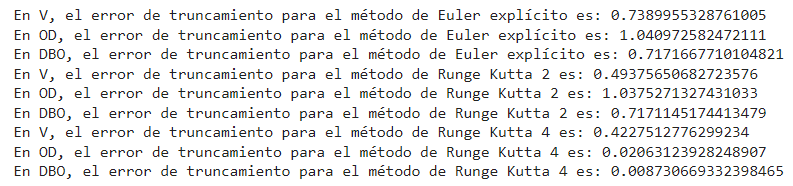

Errores de truncamiento con h = 7
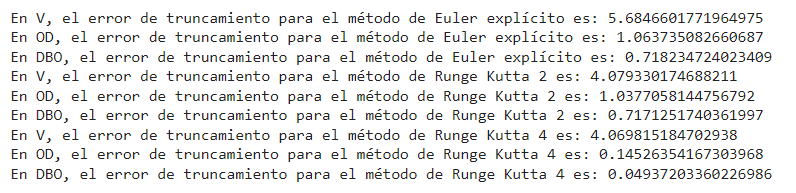

Por último, podemos observar como los valores de los errores de truncamiento aumentan a medida que incrementamos el paso temporal, mientras que, a su vez, se reafirman las conclusiones anteriores al analizar las diferencias entre los valores de OD y DBO alcanzados por Euler explícito y RK-2, principalmente.

# Conclusiones generales y otras observaciones:

#Errores tomando como solución exacta el método de Runge Kutta 2 (h = 0.01)
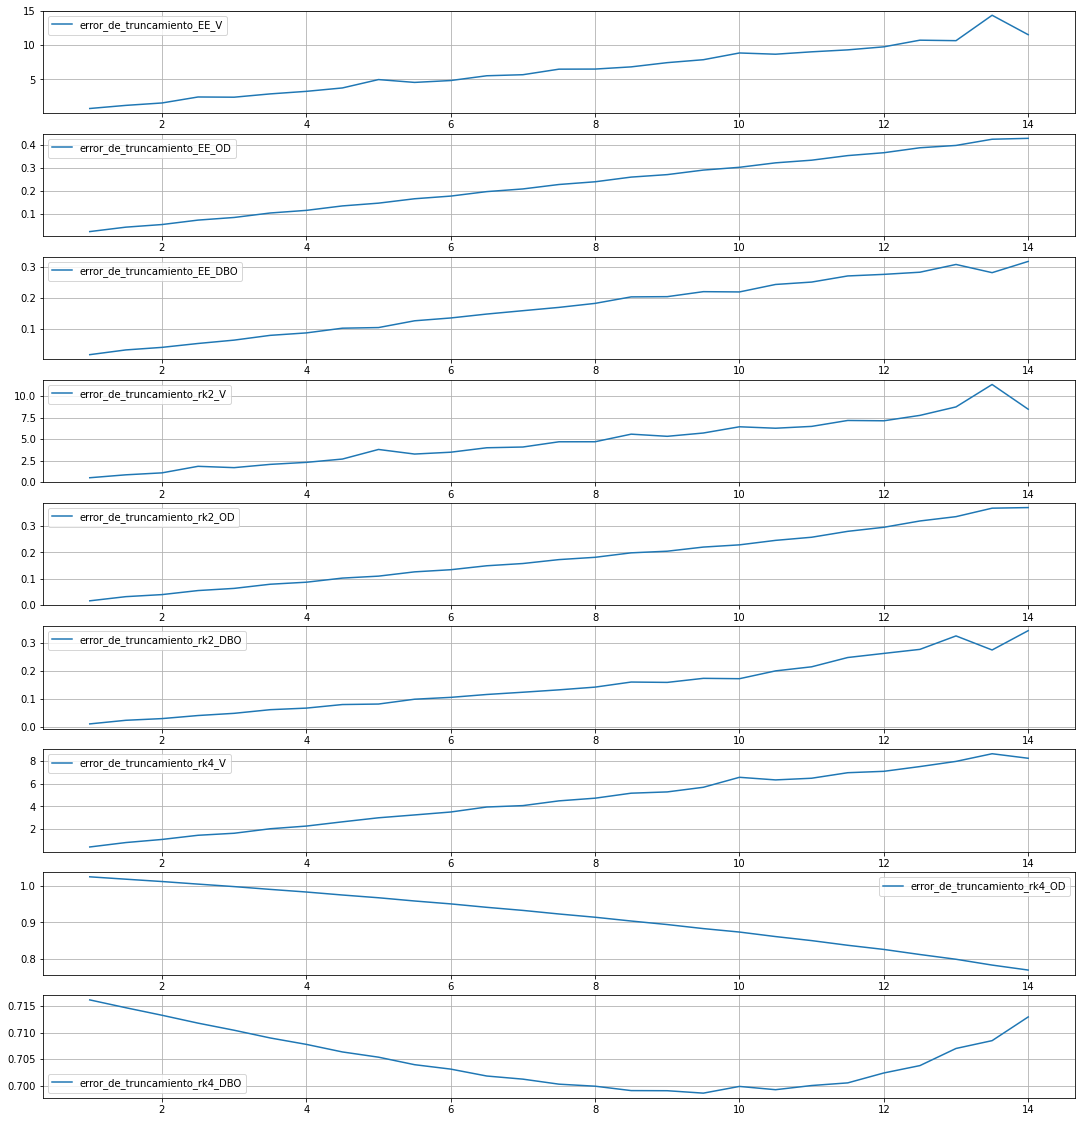

* Como puede observarse en el apartado superior, derivamos las siguientes conclusiones :
En primer lugar, observamos que tomando como aproximacion para nuestra solución "exacta", es decir, para nuestra función real, el metodo de Runge-Kutta de orden 2, con un paso de 0,01, reconocemos que el comportamiento de los errores de truncamiento con respecto al metodo de Euler explícito y Runge-Kutta de orden 2 con un paso de 1 mejora considerablemente. Esto puede verse dado que, en las graficas de EE, se mantiene de mejor manera el caracter lineal, mientras que el las graficas de RK2, no solo se reducen los "picos" finales, sino que a grandes rasgos se logra mantener una misma "concavidad", que, si bien no es evidente, podemos apreciar una pequeña curvatura convexa en sendos casos.

 Por ultimo, reconocemos que lo opuesto ocurre a la hora de analizar el error de truncamiento asociado al metodo de Runge-Kutta de orden 4, siendo evidente que para algunos casos el grafico se comporta, aproximadamente, como una función lineal.

* Si bien no logramos identificar la razón por la cual diversos aspectos de nuestro trabajo no se comportan del modo que habíamos previsto, sospechamos que el problema subyace en el modelado de la solución real a través del computo del método de Runge-Kutta de orden 4.  La razón de nuestras sospechas recáe en el hecho que, como puede observarse en las graficas representativas de los errores de truncamiento, los mismos no respetan la naturaleza que le corresponde. Como puede apreciarse, reconociendo que teóricamente el error de truncamiento del método RK-4 debe ser proporcional al "paso" elevado a la cuarta potencia, como fue explicado previamente, nuestros graficos finales no cumplen con dicha condicion, dado que devuelven una serie discreta de puntos unidos por segmentos que se aproximan considerablemente a un metodo de primer orden, es decir, muestran una conducta lineal. Esto puede ser respaldado en el apartado donde podemos apreciar que al modificar $DBOe$, la función $OD(t)$ no varía.